### Import statements and loading of dataset

In [165]:
import warnings
warnings.filterwarnings('ignore')


In [166]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from tabulate import tabulate
from scipy.stats import boxcox, skew
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import (
    silhouette_score,
    accuracy_score,
    f1_score,
    precision_recall_curve,
    auc,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    RepeatedStratifiedKFold
)
from scipy.stats import mode
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from scipy.stats import mode
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, silhouette_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold



## Data Exploration

### Initial Exploration and Checks

In [167]:

file_path = r"D:\Master Things\Fall Sem Classes\Intro to Machine Learning\Homework\Project Submission\Project Notebooks\Dataset_1\data.csv"  
data = pd.read_csv(file_path)

 I used `data.head()` to get a quick look at the first few rows of the dataset. This allows me to understand the structure of the data and verify that it has been loaded correctly. By observing the first five rows, I can check if the columns have meaningful names, confirm the dataset's general layout, and identify the types of values present. It’s my way of familiarizing myself with the data and knowing the column names and getting a glimpse of what the output looks like

In [168]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


From the output, I can see that this dataset contains a column, `Bankrupt?`, which appears to be the target column and will need to be renamed for clarity. The other columns seem to be numerical features, many of which represent financial ratios or metrics. With 96 columns in total, this dataset is rich in features, and dimensionality reduction techniques like PCA might be necessary later in the analysis to simplify the data while retaining essential information.

This initial glance also makes me consider preprocessing steps. Since most columns contain numerical data, I will likely need to normalize or standardize these features to ensure consistent scaling, especially for algorithms sensitive to variations in feature magnitude.

Using `data.info()` I am trying to figure out the data types of each feature which will allow me to get check for the null values using the Non-Null Counts

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

From the output, I can see that the dataset contains 6,819 entries and 96 columns. The vast majority of features are float64, with a few int64 columns, including the target variable, Bankrupt?. All columns have complete data, which means there are no missing values to address at this stage. This confirms that I won’t need imputation for missing values, which simplifies preprocessing. 

In [170]:
print("Number of samples and features:", data.shape)

Number of samples and features: (6819, 96)


I used the above block to verify the number of samples and features

### Checking for missing values

In [171]:

missing_columns = data.columns[data.isnull().any()]  
if missing_columns.size == 0:
    print("No missing values found.")
else:
    print("Columns with missing values:\n", missing_columns.tolist())



No missing values found.


I used the above block to verify if there is any missing values in the dataset which confirms the the non-null results from ther previous cell

 This represents a very utopian or idealistic scenario, as real-world datasets often contain gaps due to incomplete data collection, errors, or other practical limitations. Such a pristine dataset simplifies analysis and modeling, as it eliminates the need for data cleaning steps like imputing missing values or managing incomplete records, and avoids the risk of introducing bias during these processes. However, the absence of missing values could suggest that the dataset was heavily preprocessed and cleaned before being uploaded to a platform like Kaggle, ensuring its readiness for immediate use.

### Checking for categorical and numerical columns

In [172]:
# Identifying columns that are of object or category type 
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()

#  Checking numeric columns with few unique values, these may represent categories
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_columns:
    if data[col].nunique() <= 10:
        categorical_features.append(col)

#Checking for boolean columns, which are also categorical
boolean_columns = data.select_dtypes(include=['bool']).columns.tolist()
categorical_features.extend(boolean_columns)

# Removing duplicates and printing the result
categorical_features = list(set(categorical_features))
print("Categorical Features in the dataset: ", categorical_features)


Categorical Features in the dataset:  [' Liability-Assets Flag', 'Bankrupt?', ' Net Income Flag']


I needed to perform multiple checks to accurately identify categorical features because they can be represented in various forms (text, integers, booleans) and not just as `object` types, requiring me to also consider columns with few unique values or boolean flags.

This will allow me to separate the categorical variables and treat them separately in the preprocessing pipeline 

### Histogram Analysis

Creating histograms for all financial indicators allows me to visualize the distribution of the numerical features in the dataset. This helps to identify patterns like skewness, normality, or outliers, which are essential for selecting the right preprocessing techniques. For example, skewed features might need transformations like log scaling, while features with a normal distribution could be standardized to ensure consistent scaling.

This step also makes it easier to spot features with low variance, which might not add much value to the model and could be removed or down-weighted during dimensionality reduction with techniques like PCA. Additionally, histograms help to detect anomalies or irregularities, such as zero-inflated features or unexpected spikes, which might require specific preprocessing adjustments. 

By understanding these distributions, I can ensure that the preprocessing strategy is tailored to the data, improving the overall effectiveness of the machine learning pipeline (Towards Data Science, 2020)[1]. 



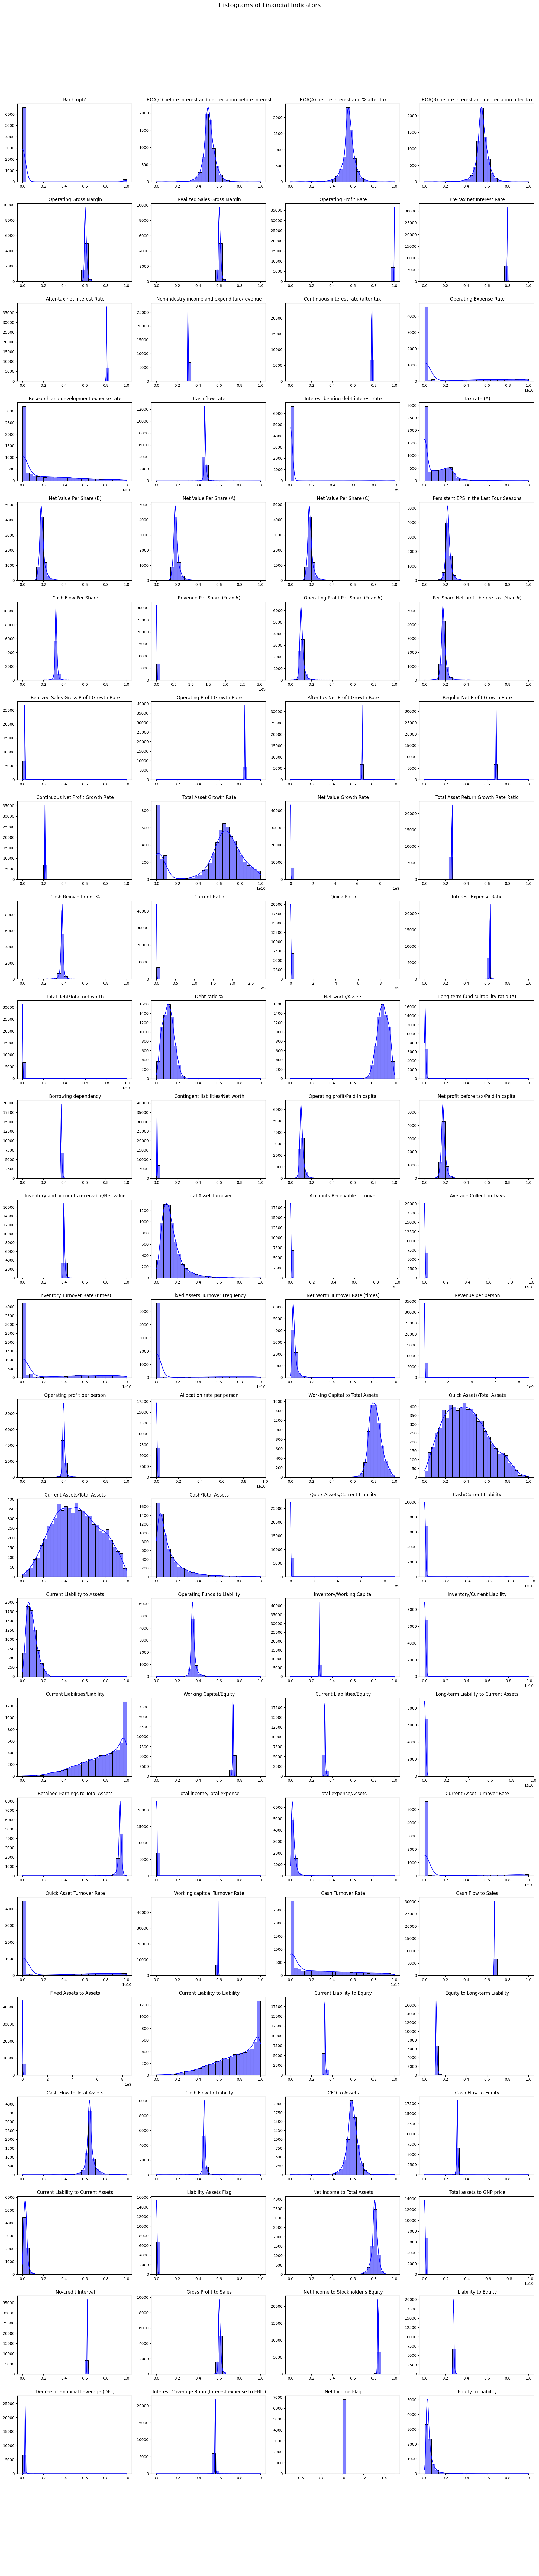

In [173]:
# Histograms of financial indicators  
num_features = data.select_dtypes(include=['number']).columns
num_plots = len(num_features)

# Calculating the number of rows and columns for subplots
rows = (num_plots // 4) + 1
fig, axes = plt.subplots(rows, 4, figsize=(20, rows * 4))
axes = axes.flatten()

# Ploting each histogram
for i, column in enumerate(num_features):
    sns.histplot(data[column], bins=30, kde=True, color='blue', ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')


for j in range(i + 1, len(axes)):
    axes[j].axis('off')

fig.suptitle("Histograms of Financial Indicators", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



#### Explanation of each histogram for each feature

1. **Bankrupt?**  
   The dataset is highly imbalanced, with the majority of observations labeled as "non-bankrupt" (0). Only a small proportion of observations are labeled as "bankrupt" (1).

2. **ROA(C) before interest and depreciation before interest**  
   This variable exhibits a roughly normal distribution centered around 0.5, with a moderate spread, indicating that most companies have similar return-on-assets ratios for this metric.

3. **ROA(A) before interest and % after tax**  
   Similar to the previous metric, this variable also displays a normal distribution centered around 0.5, though it has a slightly tighter spread.

4. **ROA(B) before interest and depreciation after tax**  
   Nearly identical to ROA(A), with a concentration near 0.5. The distribution suggests consistent values across companies.

5. **Operating Gross Margin**  
   The distribution is highly concentrated around 0.5, with very few outliers. This indicates that most companies operate within a narrow gross margin range.

6. **Realized Sales Gross Margin**  
   Similar to Operating Gross Margin, this variable shows a tight concentration, reflecting a narrow spread in realized gross margins across companies.

7. **Operating Profit Rate**  
   The distribution is heavily right-skewed, with most companies having an operating profit rate close to zero, and fewer achieving higher values.

8. **Pre-tax Net Interest Rate**  
   This variable is heavily skewed near zero, indicating that most companies have a negligible pre-tax net interest rate.

9. **After-tax Net Interest Rate**  
   Similar to the pre-tax rate, this variable is also heavily skewed near zero, showing minimal variation in after-tax net interest rates.

10. **Non-industry Income and Expenditure/Revenue**  
   The values are concentrated near zero with little variation, suggesting that non-industry contributions to revenue are negligible for most companies.

11. **Continuous Interest Rate (After Tax)**  
   The distribution is concentrated near the high end of the scale, indicating that most companies maintain a relatively high continuous interest rate after tax.

12. **Operating Expense Rate**  
   This variable is right-skewed, with most companies having lower operating expense rates and a few outliers showing higher rates.

13. **Research and Development Expense Rate**  
   The histogram is highly right-skewed, with most companies reporting very low R&D expense rates. A few extreme outliers represent companies investing heavily in R&D.

14. **Cash Flow Rate**  
   This variable shows a roughly normal distribution centered around 0.5, with a moderate spread, indicating that most companies have similar cash flow rates relative to revenue or assets.

15. **Interest-bearing Debt Interest Rate**  
   The distribution is heavily right-skewed, with most values near zero, suggesting that most companies experience low interest rates on debt.

16. **Tax Rate (A)**  
   The histogram is right-skewed, with a concentration near zero. A few companies show higher tax rates, but the majority fall in the lower range.

17. **Net Value Per Share (B)**  
   The distribution is tightly clustered around a low value (approximately 0.2–0.3), with minimal spread, indicating consistency in net value per share across companies.

18. **Net Value Per Share (A)**  
   Similar to metric B, this variable shows a concentration near 0.2–0.3, reflecting little variation across companies.

19. **Net Value Per Share (C)**  
   The distribution resembles the previous two metrics, with most values concentrated near 0.2–0.3 and a narrow spread.

20. **Persistent EPS in the Last Four Seasons**  
   The values are concentrated around a low value (approximately 0.2), with a few outliers. Most companies exhibit consistent earnings per share over the last four seasons.

21. **Cash Flow Per Share**  
   This variable shows a normal-like distribution centered near 0.3–0.4, with low variability, indicating consistent cash flow generation per share across companies.

22. **Revenue Per Share (Yuan ¥)**  
   The histogram is highly skewed, with most values near zero. A few extreme outliers represent companies with significantly higher revenue per share.

23. **Operating Profit Per Share (Yuan ¥)**  
   The distribution is right-skewed, with most values clustered near zero, indicating that only a few companies achieve high operating profit per share.

24. **Per Share Net Profit Before Tax (Yuan ¥)**  
   Similar to the previous feature, this variable is highly right-skewed, with most values near zero and a few outliers showing higher net profits before tax.

25. **Realized Sales Gross Profit Growth Rate**  
   Most values are concentrated near zero, suggesting that the majority of companies experience negligible or stagnant gross profit growth.

26. **Operating Profit Growth Rate**  
   Similar to the realized sales growth rate, this variable is concentrated near zero, with little variation.

27. **After-tax Net Profit Growth Rate**  
   The histogram is concentrated at zero, implying that most companies exhibit little to no growth in after-tax net profits.

28. **Regular Net Profit Growth Rate**  
   The distribution is also concentrated near zero, indicating minimal regular net profit growth for most companies.

29. **Continuous Net Profit Growth Rate**  
   Similar to the other growth metrics, this variable shows values primarily near zero, indicating negligible continuous net profit growth across companies.

30. **Total Asset Growth Rate**  
   The distribution is roughly normal but slightly skewed, with most values centered around 0.5, reflecting moderate variability in asset growth rates.

31. **Net Value Growth Rate**  
   This feature is heavily skewed, with a majority of values near zero, and very few companies exhibiting substantial net value growth.

32. **Total Asset Return Growth Rate Ratio**  
   The values are tightly concentrated near zero, suggesting minimal return growth from total assets across companies.

33. **Cash Reinvestment %**  
   This variable is highly concentrated near zero, indicating that most companies reinvest very little.

34. **Current Ratio**  
   The distribution is skewed with a few outliers, but most values are near zero.

35. **Quick Ratio**  
   Similar to the Current Ratio, most values are low, with a few higher outliers.

36. **Interest Expense Ratio**  
   The distribution is concentrated around zero, indicating low interest expense ratios for most companies.

37. **Total Debt/Total Net Worth**  
   This variable has a large peak near zero, with a few companies showing higher values.

38. **Debt Ratio %**  
   The histogram shows a moderate peak near 0.2, reflecting some variability in debt ratios across companies.

39. **Net Worth/Assets**  
   The values are centered near 0.6, indicating that a reasonable proportion of net worth is tied to assets.

40. **Long-term Fund Suitability Ratio (A)**  
   The distribution is highly concentrated near zero, suggesting limited long-term funding suitability for most companies.

41. **Borrowing Dependency**  
   The histogram is sharply peaked near zero, indicating low reliance on borrowing for the majority of companies.

42. **Contingent Liabilities/Net Worth**  
   Most values are near zero, with a few outliers representing companies with higher contingent liabilities.

43. **Operating Profit/Paid-in Capital**  
   The distribution is heavily concentrated at low values, reflecting limited profitability relative to paid-in capital.

44. **Net Profit Before Tax/Paid-in Capital**  
   Similar to the Operating Profit ratio, this variable is concentrated near zero, showing low profit relative to capital.

45. **Inventory & Accounts Receivable/Net Value**  
   This variable is sharply peaked at a low ratio, indicating minimal inventory and accounts receivable relative to net value.

46. **Total Asset Turnover**  
   The distribution is skewed, with most values clustered around 0.2.

47. **Accounts Receivable Turnover**  
   The histogram is peaked at low values, with a long tail showing a few companies with higher turnover rates.

48. **Average Collection Days**  
   This variable has a long tail, reflecting a wide variation in payment collection times across companies.

49. **Inventory Turnover Rate (times)**  
   The histogram is concentrated at low values, with a few large outliers.

50. **Fixed Assets Turnover Frequency**  
   Similar to the Inventory Turnover Rate, this variable is concentrated at lower values.

51. **Net Worth Turnover Rate (times)**  
   The distribution is sharply peaked at low values, indicating limited turnover rates.

52. **Revenue Per Person**  
   The histogram is long-tailed, with most values concentrated near zero.

53. **Operating Profit Per Person**  
   This variable is centered near zero, reflecting low profitability per employee.

54. **Allocation Rate Per Person**  
   The histogram is sharply peaked at low values.

55. **Working Capital to Total Assets**  
   The distribution is centered around 0.5, indicating balanced working capital relative to total assets for most companies.

56. **Quick Assets/Total Assets**  
   This variable is spread around 0.5, with moderate variability.

57. **Cash/Total Assets**  
   The histogram is skewed, with most values near zero, indicating low cash reserves relative to total assets.

58. **Current Assets/Total Assets**  
   This variable has a relatively uniform distribution between 0 and 0.8.

59. **Current Liability to Assets**  
   The distribution is peaked at low values, suggesting minimal current liabilities relative to assets.

60. **Operating Funds to Liability**  
   The values are sharply peaked at very low levels.

61. **Inventory/Working Capital**  
   The histogram is sharply peaked near zero, with a few companies having higher ratios.

62. **Inventory/Current Liability**  
   This variable is peaked near zero, with a long tail representing outliers.

63. **Current Liabilities/Liability**  
   The distribution is nearly uniform, with a slight upward trend toward 1.

64. **Working Capital/Equity**  
   Most values are clustered around zero, with minimal variation.

65. **Current Liabilities/Equity**  
   The histogram is highly skewed toward zero, with a sharp drop-off.

66. **Long-term Liability to Current Assets**  
   The distribution is sharply peaked near zero, showing low long-term liabilities relative to current assets.

67. **Retained Earnings to Total Assets**  
   This variable is concentrated near 1, indicating that most companies retain a high percentage of earnings.

68. **Total Income/Total Expense**  
   The majority of values are around zero, reflecting proportional expense-to-income ratios.

69. **Total Expense/Assets**  
   The distribution is peaked at low values, indicating lower expenses relative to assets.

70. **Current Asset Turnover Rate**  
   This variable is skewed toward lower values, with a long tail.

71. **Quick Asset Turnover Rate**  
   The distribution is sharply peaked at very low values, indicating limited turnover.

72. **Working Capital Turnover Rate**  
   The values are sharply concentrated near zero, with a steep decline.

73. **Cash Turnover Rate**  
   This variable is peaked near zero, indicating limited cash turnover.

74. **Cash Flow to Sales**  
   The histogram is sharply concentrated near zero, reflecting low cash flow relative to sales.

75. **Fixed Assets to Assets**  
   The distribution is concentrated near zero, indicating a minimal proportion of fixed assets relative to total assets.

76. **Current Liability to Liability**  
   The distribution shows a steady upward trend, peaking around 1.

77. **Current Liability to Equity**  
   This variable is peaked at low values, suggesting low relative liabilities.

78. **Equity to Long-term Liability**  
   The histogram is highly concentrated near zero, indicating low equity compared to long-term liabilities.

79. **Cash Flow to Total Assets**  
   The feature is concentrated around 0.5–0.6, showing a moderate ratio with little variation.

80. **Cash Flow to Liability**  
   Values are tightly clustered around 0.5–0.6, indicating consistent cash flow relative to liabilities.

81. **CFO to Assets**  
   This variable exhibits a narrow spread, with most values near 0.6, suggesting uniformity in CFO relative to assets.

82. **Cash Flow to Equity**  
   The distribution is highly skewed, with most companies having extremely low values close to zero.

83. **Current Liability to Current Assets**  
   The histogram is sharply skewed towards zero, indicating low current liability ratios.

84. **Liability-Assets Flag**  
   The binary distribution shows a clear split between two groups of companies.

85. **Net Income to Total Assets**  
   Values are concentrated around 0.5–0.6, reflecting steady profitability relative to assets for most companies.

86. **Total Assets to GNP Price**  
   The distribution is dominated by a few extreme outliers, with most values near zero.

87. **No-credit Interval**  
   The values are heavily skewed near zero, indicating limited credit intervals for most companies.

88. **Gross Profit to Sales**  
   The histogram peaks around 0.4–0.5, suggesting moderate gross profit margins.

89. **Net Income to Stockholder's Equity**  
   The values are mostly between 0.5–0.6, indicating consistent returns on equity.

90. **Liability to Equity**  
   This variable is skewed heavily towards zero, showing low liabilities compared to equity.

91. **Degree of Financial Leverage (DFL)**  
   The distribution is highly concentrated near zero, indicating minimal leverage.

92. **Interest Coverage Ratio (Interest Expense to EBIT)**  
   The distribution peaks near zero, showing that many companies have low interest coverage.

93. **Net Income Flag**  
   The binary distribution reflects a distinct split into positive or non-positive net income.

94. **Equity to Liability**  
   The distribution is skewed toward low values, indicating lower equity relative to liabilities.  


95. **Constant Capital Stock Percentage**  
   This feature measures the proportion of a company’s capital stock that remains constant over time. The distribution is heavily concentrated near zero, suggesting that most companies have limited changes in their capital stock.

96. **Net Income Before Tax/Paid-in Capital**  
   This feature reflects the efficiency of capital utilization in generating income. The distribution is skewed, with most values clustered at low levels and a long tail representing a few companies with higher ratios.



From the histogram I belive that these are the steps that need to be feautred in the the preprocessing pipeline

- **Heavily skewed features**, like `Operating Profit Rate`, `Net Income Before Tax/Paid-in Capital`, and `Revenue Per Share (Yuan ¥)`, require log or Box-Cox transformations to reduce skewness. This will prevent the clustering algorithm from overly weighting these features due to their asymmetric distribution.
- **Features with extreme outliers**, such as `Average Collection Days` and `Net Income to Stockholder's Equity`, need robust scaling or clipping to minimize the disproportionate impact of outliers on cluster centroids or similarity calculations.
- **Features with high proportions of zero values**, like `Non-industry Income and Expenditure/Revenue` and `Cash Flow to Equity`, require specialized imputation techniques or sparsity-aware transformations to retain meaningful patterns.


### Understanding the real world context

I implemented the below cell to understand what each column means and stands for in the real world 

In [174]:
data.columns.tolist()

['Bankrupt?',
 ' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Operating Gross Margin',
 ' Realized Sales Gross Margin',
 ' Operating Profit Rate',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Non-industry income and expenditure/revenue',
 ' Continuous interest rate (after tax)',
 ' Operating Expense Rate',
 ' Research and development expense rate',
 ' Cash flow rate',
 ' Interest-bearing debt interest rate',
 ' Tax rate (A)',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Cash Flow Per Share',
 ' Revenue Per Share (Yuan ¥)',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Realized Sales Gross Profit Growth Rate',
 ' Operating Profit Growth Rate',
 ' After-tax Net Profit Growth Rate',
 ' Regular Net Profit Growth Rate',
 ' C


1. **Bankrupt?** - Indicator variable specifying whether a company is bankrupt (1) or not (0).
2. **ROA(C) before interest and depreciation before interest** - Return on assets before accounting for interest and depreciation.
3. **ROA(A) before interest and % after tax** - Return on assets after tax but before interest is deducted.
4. **ROA(B) before interest and depreciation after tax** - Return on assets, incorporating depreciation and after-tax.
5. **Operating Gross Margin** - Gross profit as a percentage of revenue.
6. **Realized Sales Gross Margin** - Actual gross profit margin realized from sales.
7. **Operating Profit Rate** - Operating profit as a percentage of revenue.
8. **Pre-tax net Interest Rate** - Net interest rate before tax.
9. **After-tax net Interest Rate** - Net interest rate after tax.
10. **Non-industry income and expenditure/revenue** - Ratio of non-operational income or expenses to total revenue.
11. **Continuous interest rate (after tax)** - Interest rate continuity after tax effects.
12. **Operating Expense Rate** - Operating expenses as a percentage of total revenue.
13. **Research and development expense rate** - R&D expenses as a percentage of total revenue.
14. **Cash flow rate** - Cash flow generated relative to sales or assets.
15. **Interest-bearing debt interest rate** - Interest on debts as a percentage of total liabilities.
16. **Tax rate (A)** - Effective tax rate.
17. **Net Value Per Share (B)** - Shareholder equity per share based on book value.
18. **Net Value Per Share (A)** - Equity per share, possibly adjusted for preferred stocks.
19. **Net Value Per Share (C)** - Adjusted equity per share calculation.
20. **Persistent EPS in the Last Four Seasons** - Stable earnings per share over the past year.
21. **Cash Flow Per Share** - Cash flow generated per share of stock.
22. **Revenue Per Share (Yuan ¥)** - Revenue earned per share.
23. **Operating Profit Per Share (Yuan ¥)** - Operating profit distributed per share.
24. **Per Share Net profit before tax (Yuan ¥)** - Net profit before tax apportioned per share.
25. **Realized Sales Gross Profit Growth Rate** - Growth rate of gross profit from sales over time.
26. **Operating Profit Growth Rate** - Growth rate in operating profit over a specific period.
27. **After-tax Net Profit Growth Rate** - Growth rate of net profit after tax.
28. **Regular Net Profit Growth Rate** - Consistent growth rate in net profit.
29. **Continuous Net Profit Growth Rate** - Steady net profit growth rate over time.
30. **Total Asset Growth Rate** - Growth rate of total assets.
31. **Net Value Growth Rate** - Growth rate of the net asset value.
32. **Total Asset Return Growth Rate Ratio** - Growth rate of returns generated by total assets.
33. **Cash Reinvestment %** - Percentage of cash flow reinvested back into the business.
34. **Current Ratio** - Ratio of current assets to current liabilities.
35. **Quick Ratio** - Ratio of liquid assets to current liabilities.
36. **Interest Expense Ratio** - Interest expense as a percentage of revenue or operating income.
37. **Total debt/Total net worth** - Ratio of total debt to shareholder equity.
38. **Debt ratio %** - Total debt as a percentage of total assets.
39. **Net worth/Assets** - Net worth as a proportion of total assets.
40. **Long-term fund suitability ratio (A)** - Suitability of long-term funding sources relative to long-term investments.
41. **Borrowing dependency** - Dependency on borrowed funds for operational or investment needs.
42. **Contingent liabilities/Net worth** - Ratio of contingent liabilities to net worth.
43. **Operating profit/Paid-in capital** - Operating profit relative to invested capital.
44. **Net profit before tax/Paid-in capital** - Net profit before tax as a percentage of paid-in capital.
45. **Inventory and accounts receivable/Net value** - Ratio of inventory and receivables to net value.
46. **Total Asset Turnover** - Revenue generated per unit of total assets.
47. **Accounts Receivable Turnover** - Speed at which accounts receivable are collected.
48. **Average Collection Days** - Average days required to collect accounts receivable.
49. **Inventory Turnover Rate (times)** - Frequency of inventory being sold and replaced.
50. **Fixed Assets Turnover Frequency** - Revenue generated relative to fixed assets.
51. **Net Worth Turnover Rate (times)** - Revenue generated relative to shareholder equity.
52. **Revenue per person** - Revenue generated per employee.
53. **Operating profit per person** - Operating profit generated per employee.
54. **Allocation rate per person** - Distribution rate per employee.
55. **Working Capital to Total Assets** - Working capital as a percentage of total assets.
56. **Quick Assets/Total Assets** - Quick assets as a percentage of total assets.
57. **Current Assets/Total Assets** - Current assets as a percentage of total assets.
58. **Cash/Total Assets** - Cash as a percentage of total assets.
59. **Quick Assets/Current Liability** - Quick assets relative to current liabilities.
60. **Cash/Current Liability** - Cash relative to current liabilities.
61. **Current Liability to Assets** - Current liabilities as a percentage of total assets.
62. **Operating Funds to Liability** - Operating funds as a percentage of liabilities.
63. **Inventory/Working Capital** - Inventory as a percentage of working capital.
64. **Inventory/Current Liability** - Inventory as a percentage of current liabilities.
65. **Current Liabilities/Liability** - Current liabilities as a proportion of total liabilities.
66. **Working Capital/Equity** - Working capital relative to shareholder equity.
67. **Current Liabilities/Equity** - Current liabilities relative to shareholder equity.
68. **Long-term Liability to Current Assets** - Long-term liabilities as a proportion of current assets.
69. **Retained Earnings to Total Assets** - Retained earnings as a percentage of total assets.
70. **Total income/Total expense** - Ratio of total income to total expenses.
71. **Total expense/Assets** - Total expenses as a percentage of total assets.
72. **Current Asset Turnover Rate** - Rate at which current assets generate revenue.
73. **Quick Asset Turnover Rate** - Efficiency of quick assets in generating revenue.
74. **Working capital Turnover Rate** - Revenue generated per unit of working capital.
75. **Cash Turnover Rate** - Cash utilization efficiency in generating revenue.
76. **Cash Flow to Sales** - Proportion of sales converted into cash flow.
77. **Fixed Assets to Assets** - Fixed assets as a percentage of total assets.
78. **Current Liability to Liability** - Proportion of total liabilities that are current liabilities.
79. **Current Liability to Equity** - Current liabilities relative to shareholder equity.
80. **Equity to Long-term Liability** - Equity relative to long-term liabilities.
81. **Cash Flow to Total Assets** - Cash flow generated as a percentage of total assets.
82. **Cash Flow to Liability** - Cash flow generated as a percentage of total liabilities.
83. **CFO to Assets** - Operating cash flow as a proportion of total assets.
84. **Cash Flow to Equity** - Cash flow generated as a percentage of shareholder equity.
85. **Current Liability to Current Assets** - Current liabilities relative to current assets.
86. **Liability-Assets Flag** - Indicator if liabilities exceed assets.
87. **Net Income to Total Assets** - Net income generated as a percentage of total assets.
88. **Total assets to GNP price** - Ratio of total assets to Gross National Product price.
89. **No-credit Interval** - Duration a company can operate without borrowing.
90. **Gross Profit to Sales** - Gross profit as a percentage of total sales.
91. **Net Income to Stockholder's Equity** - Return on equity, net income as a percentage of shareholder equity.
92. **Liability to Equity** - Total liabilities relative to shareholder equity.
93. **Degree of Financial Leverage (DFL)** - Sensitivity of net income to changes in operating income.
94. **Interest Coverage Ratio (Interest expense to EBIT)** - Ability to cover interest expenses with operating income.
95. **Net Income Flag** - Indicator if net income is positive or negative.
96. **Equity to Liability** - Shareholder equity relative to total liabilities.

These are the definitions of each column, and to research and gain domain-specific knowledge, I used ChatGPT to acquire and validate my information.

### Correlation Analysis


Correlation is essential in clustering because it helps identify relationships between variables, enabling more informed feature selection and improving the clustering process. By understanding which features are strongly correlated, redundant variables can be removed, simplifying the dataset and ensuring that clustering algorithms focus on meaningful patterns rather than noise. As highlighted in the article by Drive Research[8], correlation analysis reveals how variables interact, providing insights into which factors drive similarities or differences among data points. For instance, in market research, if variables like customer satisfaction and repeat purchases are highly correlated, clustering can group customers based on these meaningful dimensions, leading to actionable insights for segmentation and targeting. Incorporating correlation analysis into clustering ensures that the results are data-driven, interpretable, and aligned with the underlying relationships in the data.

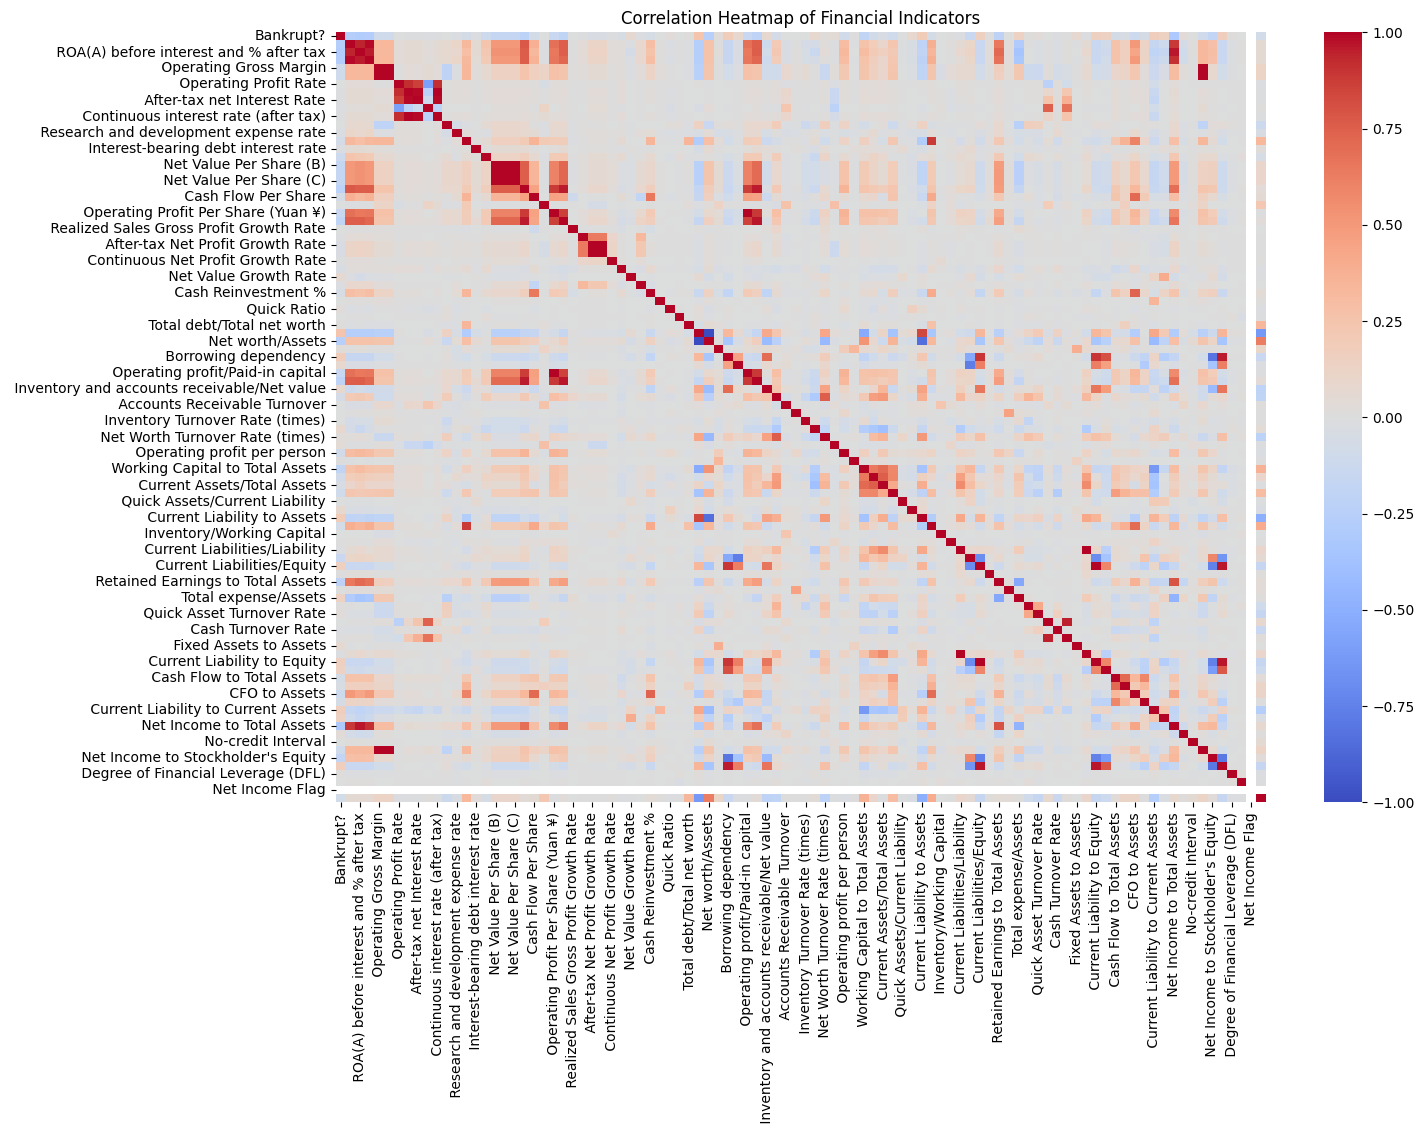

In [175]:

# 3. Correlation heatmap to understand relationships between features
plt.figure(figsize=(15, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Correlation Heatmap of Financial Indicators")
plt.show()



This correlation heatmap illustrates the relationships between various financial indicators, with values ranging from -1 (strong negative correlation) to +1 (strong positive correlation). Bright red indicates strong positive relationships, blue signifies strong negative relationships, and gray shows weaker correlations. 

The **correlation matrix** further solidified the conclusions I drew from the **histogram analysis**:

- **Low-Variance Features**:  
   Features like `Borrowing Dependency` and `Non-industry Income and Expenditure/Revenue` show consistently weak correlations with other variables. This confirms that they contribute little information and should be **removed to reduce noise** in the dataset.

- **Strongly Correlated Features**:  
   Groups of features such as `Quick Ratio`, `Current Ratio`, and `Cash Flow to Total Assets` exhibit **high inter-correlations**. This validates the need for **dimensionality reduction** techniques like **Principal Component Analysis (PCA)** to eliminate redundancy and streamline the dataset.

- **Skewed and Outlier-Prone Features**:  
   Features identified as **skewed** or containing **extreme outliers** in the histograms, like `Average Collection Days` and `Net Income to Stockholder's Equity`, are confirmed here by their inconsistent correlations with other variables. These features will require appropriate **transformations** and **robust scaling**.


## Data Preprocessing 

### Fixing the names of the columns/features to make the dataset more usable

This was done to make the columns or features more usable for future cells

In [176]:
# Renaming the 'Bankrupt? column to 'Bankrupt'
data.rename(columns={'Bankrupt?': 'Bankrupt'}, inplace=True)


# Standardizing column names in the DataFrame
data.columns = data.columns.str.strip()  # Removing leading and trailing spaces
data.columns = data.columns.str.replace(r'\s+', ' ', regex=True)  # Replacing multiple spaces with a single space

# Verifying column names after renaming
for col in data.columns:
    print(col)

# Bankruptcy Verification
print(data['Bankrupt'])


Bankrupt
ROA(C) before interest and depreciation before interest
ROA(A) before interest and % after tax
ROA(B) before interest and depreciation after tax
Operating Gross Margin
Realized Sales Gross Margin
Operating Profit Rate
Pre-tax net Interest Rate
After-tax net Interest Rate
Non-industry income and expenditure/revenue
Continuous interest rate (after tax)
Operating Expense Rate
Research and development expense rate
Cash flow rate
Interest-bearing debt interest rate
Tax rate (A)
Net Value Per Share (B)
Net Value Per Share (A)
Net Value Per Share (C)
Persistent EPS in the Last Four Seasons
Cash Flow Per Share
Revenue Per Share (Yuan ¥)
Operating Profit Per Share (Yuan ¥)
Per Share Net profit before tax (Yuan ¥)
Realized Sales Gross Profit Growth Rate
Operating Profit Growth Rate
After-tax Net Profit Growth Rate
Regular Net Profit Growth Rate
Continuous Net Profit Growth Rate
Total Asset Growth Rate
Net Value Growth Rate
Total Asset Return Growth Rate Ratio
Cash Reinvestment %
Current

### Segragating numberical and categorical variables

In [177]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
potential_categorical_columns = [col for col in numerical_columns if data[col].nunique() <= 2]
print("Numerical columns:", len(numerical_columns))
print("Categorical columns:", len(potential_categorical_columns))

Numerical columns: 96
Categorical columns: 3


In [178]:

categorical_columns = potential_categorical_columns
numerical_columns = [col for col in numerical_columns if col not in potential_categorical_columns]
print(categorical_columns)
print(numerical_columns)


['Bankrupt', 'Liability-Assets Flag', 'Net Income Flag']
['ROA(C) before interest and depreciation before interest', 'ROA(A) before interest and % after tax', 'ROA(B) before interest and depreciation after tax', 'Operating Gross Margin', 'Realized Sales Gross Margin', 'Operating Profit Rate', 'Pre-tax net Interest Rate', 'After-tax net Interest Rate', 'Non-industry income and expenditure/revenue', 'Continuous interest rate (after tax)', 'Operating Expense Rate', 'Research and development expense rate', 'Cash flow rate', 'Interest-bearing debt interest rate', 'Tax rate (A)', 'Net Value Per Share (B)', 'Net Value Per Share (A)', 'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons', 'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)', 'Operating Profit Per Share (Yuan ¥)', 'Per Share Net profit before tax (Yuan ¥)', 'Realized Sales Gross Profit Growth Rate', 'Operating Profit Growth Rate', 'After-tax Net Profit Growth Rate', 'Regular Net Profit Growth Rate', 'Continuous Ne

This above cells were executed to separate the categorical and numerical columns for separate preprocessing treatement 

### Box-Cox and Log Transformation

The Box-Cox transformation is a statistical method used to stabilize variance and make data approximate a normal distribution. It applies a power transformation to a dataset, modifying the values based on a parameter, lambda, which is optimized to minimize skewness. This technique is particularly useful for handling skewed data, as it can make relationships between variables more linear and improve the performance of statistical models and clustering algorithms. However, the Box-Cox transformation is applicable only to positive data; any zero or negative values need to be adjusted before applying the transformation. By making the data more normally distributed, the Box-Cox transformation enhances the interpretability and reliability of analytical results.[9]

The log transformation is a widely used technique in data preprocessing to handle skewed data and stabilize variance. By applying a logarithmic function, it compresses large values and expands smaller values, thereby reducing the impact of outliers and improving the interpretability of data. This transformation is especially effective for data with exponential growth patterns, as it converts multiplicative relationships into additive ones, making linear models more effective. Additionally, log transformation can help normalize data distributions, bringing them closer to normality, which is often a prerequisite for statistical analysis and clustering algorithms.[10]



In [179]:

# Defining a skewness threshold
skew_threshold = 1.0

# Identifying numerical columns with skewness greater than the threshold
skewed_features = [col for col in numerical_columns if skew(data[col]) > skew_threshold]

print("Skewed features identified:")
print(skewed_features)

# Handling Skewed Features
for feature in skewed_features:
    if feature in data.columns:
        min_value = data[feature].min()
        if min_value <= 0:
            data[feature] = np.log1p(data[feature].clip(lower=1e-5))  # Log transformation for non-positive values
        else:
            data[feature], _ = boxcox(data[feature])  # Box-Cox transformation for positive values


Skewed features identified:
['Non-industry income and expenditure/revenue', 'Operating Expense Rate', 'Research and development expense rate', 'Cash flow rate', 'Interest-bearing debt interest rate', 'Tax rate (A)', 'Net Value Per Share (B)', 'Net Value Per Share (A)', 'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons', 'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)', 'Operating Profit Per Share (Yuan ¥)', 'Per Share Net profit before tax (Yuan ¥)', 'Realized Sales Gross Profit Growth Rate', 'Continuous Net Profit Growth Rate', 'Net Value Growth Rate', 'Total Asset Return Growth Rate Ratio', 'Cash Reinvestment %', 'Current Ratio', 'Quick Ratio', 'Total debt/Total net worth', 'Long-term fund suitability ratio (A)', 'Borrowing dependency', 'Contingent liabilities/Net worth', 'Operating profit/Paid-in capital', 'Net profit before tax/Paid-in capital', 'Inventory and accounts receivable/Net value', 'Total Asset Turnover', 'Accounts Receivable Turnover', 'Average Colle

I implemented the Box-Cox and log transformations to address issues identified through the correlation matrix and histogram data analysis. From the histograms, I observed that several features, such as `Operating Profit Rate`, `Net Income Before Tax/Paid-in Capital`, and `Revenue Per Share (Yuan ¥)`, exhibited heavy skewness. These skewed distributions could disproportionately influence clustering and statistical models by overemphasizing features with large ranges. The Box-Cox transformation allowed me to stabilize variance and approximate normal distributions for features with positive values, while the log transformation was applied to handle skewed features containing zeros or negative values. The correlation matrix further revealed highly correlated features, indicating potential redundancies in the dataset. By transforming these skewed features, I aimed to improve feature relationships, linearize patterns, and reduce the impact of correlated variables on clustering. These transformations also ensured all features contributed equitably to distance computations, preventing biased cluster formations and enhancing the performance of clustering algorithms like K-Means. Together, the correlation matrix and histogram analysis guided my decision to include these transformations as part of a cohesive preprocessing pipeline, ensuring the dataset was balanced, normalized, and ready for meaningful clustering.

In [180]:
data.head()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.264398,...,0.716845,0.009177,0.622879,0.601453,0.827890,0.254799,0.026253,0.564050,1,0.016335
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.265096,...,0.795297,0.008289,0.623652,0.610237,0.839969,0.249860,0.234738,0.570175,1,0.020581
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.263929,...,0.774670,0.039223,0.623841,0.601449,0.836774,0.254788,0.026208,0.563706,1,0.016340
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.264938,...,0.739555,0.003247,0.622929,0.583538,0.834697,0.248204,0.026346,0.564663,1,0.023699
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.265034,...,0.795016,0.003870,0.623521,0.598782,0.839973,0.245698,0.024450,0.575617,1,0.034875


### Outlier Detection and too many zeroes treatement

High zero-value features are variables in a dataset where a significant proportion of the values are zero. These features often arise in datasets where specific characteristics or behaviors are rare or sparsely observed, such as niche product purchases or infrequent events. High zero proportions can introduce sparsity, which may affect the performance of clustering and statistical models by creating uneven distributions that bias results or lead to poor model generalization. Addressing high zero-value features typically involves strategies like imputation, transformation, or feature engineering to ensure that the zeros do not dominate the analysis. Checking for high zero-value features is an essential preprocessing step to maintain the integrity and interpretability of the dataset. [11]



In [181]:
# Define outlier thresholds
lower_quantile = 0.01
upper_quantile = 0.99

# Identify columns with extreme outliers based on quantiles
outlier_features = [col for col in numerical_columns if 
                    (data[col].quantile(lower_quantile) < data[col].min()) or 
                    (data[col].quantile(upper_quantile) > data[col].max())]

# Check if outlier features are identified
if outlier_features:
    print("Outlier features identified:")
    print(outlier_features)

    # Handling Outlier Features
    for feature in outlier_features:
        if feature in data.columns:
            data[feature] = data[feature].clip(lower=data[feature].quantile(0.01), 
                                               upper=data[feature].quantile(0.99))
else:
    print("No outlier features identified.")


No outlier features identified.


In [182]:

# Defining thresholds for high zero proportions
zero_thresholds = [0.1, 0.2, 0.3, 0.4, 0.5]  # Multiple thresholds for analysis

# Dictionary to store features identified for each threshold
high_zero_features_by_threshold = {}

# Checking for high zero-value features at each threshold
for threshold in zero_thresholds:
    high_zero_features = [col for col in numerical_columns if 
                          (data[col] == 0).sum() / len(data[col]) > threshold]
    high_zero_features_by_threshold[threshold] = high_zero_features
    
    if high_zero_features:
        print(f"High zero-value features for threshold {threshold*100:.0f}%:")
        print(high_zero_features)
    else:
        print(f"No high zero-value features found for threshold {threshold*100:.0f}%.")



No high zero-value features found for threshold 10%.
No high zero-value features found for threshold 20%.
No high zero-value features found for threshold 30%.
No high zero-value features found for threshold 40%.
No high zero-value features found for threshold 50%.


In [183]:
#  Handling High Zero-Value Features for a Specific Threshold (e.g., 50%)
selected_threshold = 0.5  # Adjust as needed
if selected_threshold in high_zero_features_by_threshold:
    high_zero_features = high_zero_features_by_threshold[selected_threshold]
    if high_zero_features:
        print(f"\nHandling high zero-value features for threshold {selected_threshold*100:.0f}%:")
        for feature in high_zero_features:
            if feature in data.columns:
                data[feature] = data[feature].replace(0, 1e-5)
    else:
        print(f"No high zero-value features for threshold {selected_threshold*100:.0f}%")


No high zero-value features for threshold 50%


I implemented outlier detection and high zero-value threshold analysis based on insights from the histogram and correlation matrix, even though no significant outliers or high zero-value features were ultimately found. The histogram analysis highlighted features like `Average Collection Days` and `Net Income to Stockholder's Equity` that appeared to have extreme values, which could disproportionately impact clustering by skewing centroids or similarity computations. Checking for outliers allowed me to ensure that no features dominated the analysis due to anomalous data points. Similarly, I analyzed high zero-value thresholds because features with excessive zeros, as suggested by distributions in the histogram, could introduce sparsity and bias clustering results, especially in distance-based algorithms like K-Means. Although no significant outliers or high zero-value features were identified, performing these checks was in my opinion an important step to validate the integrity of the dataset and ensure that the preprocessing pipeline addressed all potential concerns highlighted by the exploratory data analysis.

### Normalisation 

From the data exploration  I was able to deduce that I need to normalize the dataset before clustering. The histograms showed that some features, like `Revenue Per Share (Yuan ¥)` and `Operating Profit Rate`, had significantly larger ranges than others. Without normalization, these features could dominate the distance calculations, unfairly influencing the clustering process. Additionally, the correlation matrix revealed relationships between certain features that could be distorted if they were not scaled properly. By normalizing the features to a similar range, I ensured that no single feature had an outsized influence, allowing the clustering algorithm, such as K-means, to consider all features fairly. This step was essential to creating accurate and meaningful clusters that reflect the true structure of the data.

Reference:[3]

In [184]:

# Cleaning numerical_columns to ensure consistency
numerical_columns = [re.sub(r'\s+', ' ', col.strip()) for col in numerical_columns]

# Verifying mismatches between cleaned numerical_columns and DataFrame columns
missing_columns = [col for col in numerical_columns if col not in data.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")

# Standardizing numerical columns if no mismatches
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Verifying the standardized data
print("Data after standardization:")
print(data[numerical_columns].head())


Data after standardization:
   ROA(C) before interest and depreciation before interest  \
0                                          -2.217909         
1                                          -0.673828         
2                                          -1.303672         
3                                          -1.735886         
4                                          -0.661778         

   ROA(A) before interest and % after tax  \
0                               -2.045798   
1                               -0.311068   
2                               -0.908420   
3                               -1.636209   
4                               -0.307745   

   ROA(B) before interest and depreciation after tax  Operating Gross Margin  \
0                                          -2.400361               -0.383334   
1                                          -0.598450                0.135068   
2                                          -1.319910               -0.383759   
3       

In [185]:
data.head()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,-2.217909,-2.045798,-2.400361,-0.383334,-0.382638,0.016456,-0.023516,-0.020165,-0.094564,...,-2.254317,-0.053359,-0.084274,-0.383465,-0.861611,0.768210,-0.070705,-0.098978,1,-0.696938
1,1,-0.673828,-0.311068,-0.598450,0.135068,0.136307,0.014671,0.014799,0.015966,-0.002636,...,-0.309033,-0.054092,-0.021388,0.135253,-0.029804,0.275996,17.612684,0.364559,1,-0.595566
2,1,-1.303672,-0.908420,-1.319910,-0.383759,-0.388177,0.007858,-0.061111,-0.051183,-0.156350,...,-0.820510,-0.028549,-0.005984,-0.383698,-0.249820,0.767178,-0.074498,-0.125015,1,-0.696812
3,1,-1.735886,-1.636209,-1.556340,-1.441418,-1.441832,-0.004257,-0.017313,-0.008676,-0.023531,...,-1.691222,-0.058255,-0.080226,-1.441526,-0.392864,0.110905,-0.062773,-0.052562,1,-0.521127
4,1,-0.661778,-0.307745,-0.508050,-0.541238,-0.540708,0.016758,0.013703,0.016186,-0.010861,...,-0.316008,-0.057741,-0.032052,-0.541255,-0.029564,-0.138822,-0.223591,0.776395,1,-0.254338


#### Code to Check Normalisation

In [186]:
df=pd.DataFrame(data)
stats=df.describe()


df_stats = pd.DataFrame({
    "Mean": df.mean(),
    "Standard Deviation": df.std(),
    "Min": df.min(),
    "Max": df.max(),
    "Range": df.max() - df.min()
})
print("Descriptive Statistics:")
print(stats)

print("\nAdditional Normalization Checks:")
print(df_stats)

Descriptive Statistics:
          Bankrupt  ROA(C) before interest and depreciation before interest  \
count  6819.000000                                       6.819000e+03         
mean      0.032263                                      -1.833928e-16         
std       0.176710                                       1.000073e+00         
min       0.000000                                      -8.325144e+00         
25%       0.000000                                      -4.721818e-01         
50%       0.000000                                      -4.077099e-02         
75%       0.000000                                       5.007018e-01         
max       1.000000                                       8.154428e+00         

       ROA(A) before interest and % after tax  \
count                            6.819000e+03   
mean                             3.501134e-16   
std                              1.000073e+00   
min                             -8.513649e+00   
25%                

Standardizing the numerical features was important here for this dataset because it ensures that all features contribute equally to distance calculations, which is critical for clustering and many machine learning algorithms. By centering each feature (subtracting the mean) and scaling it (dividing by the standard deviation), the dataset is transformed to have a mean of 0 and a standard deviation of 1. This eliminates the bias introduced by features with larger ranges dominating the analysis, as seen in algorithms like K-Means, which rely on distance metrics. Standardization also helps improve numerical stability in computations, ensuring that features with different units or magnitudes do not skew the results. This preprocessing step was particularly effective in creating a balanced dataset, making clustering more reliable and ensuring meaningful groupings.

## Feature Engineering

### Creating Featues from pre exsisiting columns

In [187]:

target_column = 'Bankrupt'

# Profitability Ratios
data['profit_margin'] = data['Net Income to Total Assets']  # Profitability relative to assets
data['gross_profit_margin'] = data['Gross Profit to Sales']  # Gross profit as a percentage of sales
data['return_on_equity'] = data['Net Income to Stockholder\'s Equity']  # Return on equity (ROE)

# Leverage and Solvency Ratios
data['debt_to_equity'] = data['Liability to Equity']  # Debt-to-equity ratio
data['equity_to_liability'] = data['Equity to Liability']  # Equity-to-liability ratio

# Efficiency Ratios
data['total_asset_turnover'] = data['Total Asset Turnover']  # How efficiently assets generate revenue
data['current_asset_turnover'] = data['Current Asset Turnover Rate']  # Efficiency of current assets
data['inventory_turnover'] = data['Inventory Turnover Rate (times)']  # How often inventory is sold

# Composite Health Index (average of selected ratios)
data['health_index'] = data[['profit_margin', 'gross_profit_margin', 'return_on_equity']].mean(axis=1)




I created these ratios and the composite health index to extract more meaningful insights from the dataset and enhance the clustering process. By engineering features like profitability ratios (`profit_margin`, `gross_profit_margin`, and `return_on_equity`), leverage ratios (`debt_to_equity` and `equity_to_liability`), and efficiency ratios (`total_asset_turnover`, `current_asset_turnover`, and `inventory_turnover`), I was able to capture key aspects of financial performance and operational efficiency that go beyond the raw data. The composite health index, which averages key profitability ratios, provided a holistic measure of a company's financial health, making it easier to identify patterns and group similar entities during clustering. These engineered features reflect underlying financial behaviors more effectively, contributing to more interpretable and meaningful clusters.

To figure out what would be important data points I could use for clustering I used ChatGPT to learn about financial data I could create from the columns I had as I couldnot find one consolidated piece of information to gain further domain knowledge which would be needed for this.

This cell below was executed to standardize or normalize the features that were engineered from the exsisting data. 

In [188]:

# Standardizing the features
scaler = StandardScaler()
features = ['profit_margin', 'gross_profit_margin', 'return_on_equity', 
            'debt_to_equity', 'equity_to_liability', 'total_asset_turnover', 
            'current_asset_turnover', 'inventory_turnover', 'health_index']

# Standardizing the features for PCA
X_scaled = scaler.fit_transform(data[features])

# Dropping target column and other identifiers before applying PCA
X = data.drop(columns=[target_column])


### Using Correlation matrix to remove overlapping features

In [189]:


correlation_matrix = data.corr()


correlation_threshold = 0.85

# Finding highly correlated features
high_corr_pairs = []
for i in range(correlation_matrix.shape[0]):
    for j in range(i):  
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            high_corr_pairs.append((correlation_matrix.index[i], correlation_matrix.columns[j]))

# Displayign highly correlated feature pairs
print("Highly correlated feature pairs (|correlation| > {}):".format(correlation_threshold))
for pair in high_corr_pairs:
    print(pair)

# Identify features to drop (keep the first feature in each pair by default)
features_to_drop = set()
for feature1, feature2 in high_corr_pairs:
    features_to_drop.add(feature2)  

# Ensuring features to drop exist in the dataset
features_to_drop = [feature for feature in features_to_drop if feature in data.columns]


print("\nFeatures which have to be dropped")
print(features_to_drop)

# Drop highly correlated features from the dataset
data_cleaned = data.drop(columns=features_to_drop)

# Save the cleaned dataset
data_cleaned.to_csv('cleaned_data.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_data.csv'")


Highly correlated feature pairs (|correlation| > 0.85):
('ROA(A) before interest and % after tax', 'ROA(C) before interest and depreciation before interest')
('ROA(B) before interest and depreciation after tax', 'ROA(C) before interest and depreciation before interest')
('ROA(B) before interest and depreciation after tax', 'ROA(A) before interest and % after tax')
('Realized Sales Gross Margin', 'Operating Gross Margin')
('Pre-tax net Interest Rate', 'Operating Profit Rate')
('After-tax net Interest Rate', 'Operating Profit Rate')
('After-tax net Interest Rate', 'Pre-tax net Interest Rate')
('Continuous interest rate (after tax)', 'Operating Profit Rate')
('Continuous interest rate (after tax)', 'Pre-tax net Interest Rate')
('Continuous interest rate (after tax)', 'After-tax net Interest Rate')
('Net Value Per Share (A)', 'Net Value Per Share (B)')
('Net Value Per Share (C)', 'Net Value Per Share (B)')
('Net Value Per Share (C)', 'Net Value Per Share (A)')
('Operating Profit Per Share 

I performed this correlation analysis to identify and remove highly correlated features to streamline the dataset and improve the clustering process. From my data exploration, I noticed several features were strongly correlated, which could introduce redundancy and distort the clustering algorithm's results by overemphasizing those relationships. By calculating the correlation matrix and using a threshold of 0.85, I identified feature pairs with significant overlap and chose to drop one feature from each pair. This step helped reduce multicollinearity, simplified the dataset, and ensured that the remaining features contributed unique and meaningful information to the clustering process, ultimately leading to more accurate and interpretable clusters.
The threshold of 0.85 was chosen because it effectively balances removing redundant features while preserving distinct variance. This decision was based on evaluating clustering quality at various thresholds (0.7, 0.9, and 0.95) and, in my opinion, yielded the best results, although the detailed evaluation process is not depicted here as it required running the entire notebook.
Reference: [5]

### PCA Implementation

In [190]:
data=pd.read_csv('cleaned_data.csv')
# Applying PCA to retain 95% variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Converting PCA results to DataFrame and add target column
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
X_pca_df[target_column] = data[target_column]

# Saving the feature-engineered data with PCA components
X_pca_df.to_csv('feature_engineered_data.csv', index=False)
print("Feature-engineered data with PCA saved to 'feature_engineered_data.csv'")


explained_variance = pca.explained_variance_ratio_
print("Explained variance by each principal component:", explained_variance)


Feature-engineered data with PCA saved to 'feature_engineered_data.csv'
Explained variance by each principal component: [0.31934719 0.20423169 0.14280824 0.1067226  0.08197595 0.07257206
 0.05135885]


I applied PCA (Principal Component Analysis) to reduce the dimensionality of the dataset while retaining 95% of the variance to optimize the clustering process. With the cleaned dataset, I wanted to ensure that the features contributing the most variance were prioritized, reducing noise and redundancy that could skew the clustering results. By transforming the features into principal components, I compressed the dataset into fewer dimensions, making it computationally efficient and easier to interpret without losing critical information. Saving the PCA-transformed data ensures that the feature engineering aligns with clustering and visualization goals, while the explained variance ratio confirmed that I retained most of the dataset's original information. This step streamlined the data for clustering, enabling more accurate and meaningful groupings.

## Models

### Analysis of how many clusters would be optimal

The elbow method is a widely used technique in K-Means clustering to determine the optimal number of clusters (K) by analyzing the sum of squared distances (inertia) within clusters as the number of clusters increases. This method identifies the point where adding more clusters results in diminishing improvements, often visualized as a "bend" or "elbow" in the plot of inertia versus the number of clusters. It balances model complexity and fit by avoiding oversimplification with too few clusters or overfitting with too many. The elbow method is simple, visually intuitive, and ensures the resulting clusters are meaningful, aligning with the underlying data patterns for better interpretability and decision-making. 

Reference: [14]

In [191]:
data_pca=pd.read_csv('feature_engineered_data.csv')
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,Bankrupt
0,2.944782,0.817024,-0.700393,0.404398,0.678894,-1.851070,-0.717609,1
1,0.338306,-1.231930,0.117817,-1.080538,0.344397,0.003451,-0.265633,1
2,1.368052,-1.376926,-0.185228,-0.863421,-0.126891,-0.239765,-0.663344,1
3,2.598139,0.240725,-1.551876,-0.384473,2.036678,-0.191595,-1.090315,1
4,0.683630,1.860197,-0.641444,0.533721,0.756516,-0.570019,-0.824092,1


In [192]:
# Splitting the data into features and target
X = data_pca.drop(columns=[target_column])
y = data_pca[target_column]
target_column = 'Bankrupt'    


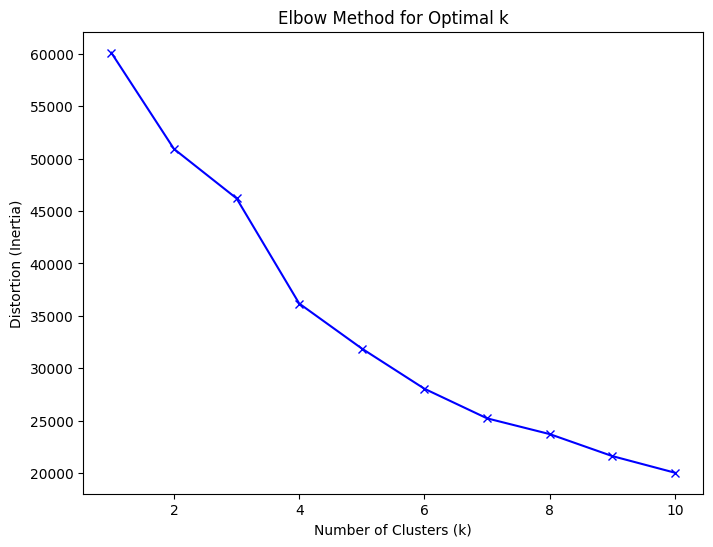

In [193]:
# Calculating distortion for different values of k
distortions = []
K = range(1, 11)  # Testing k values from 1 to 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)  # Sum of squared distances to closest cluster center


# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()

#### Analysis of Optimal K using Elbow Method
 From the elbow curve above, we can observe that k=4 appears to be the optimal number of clusters. 
 This is determined by the point where adding more clusters results in diminishing returns, visible 
 as an "elbow" in the graph. The distortion value shows a sharp decline from k=1 to k=4, after which 
 the reduction becomes minimal. This helps us balance between underfitting (too few clusters) and 
 overfitting (too many clusters). The elbow method was used here as it provides a visual and intuitive 
 way to determine the optimal k value by plotting the distortion/inertia against different k values.

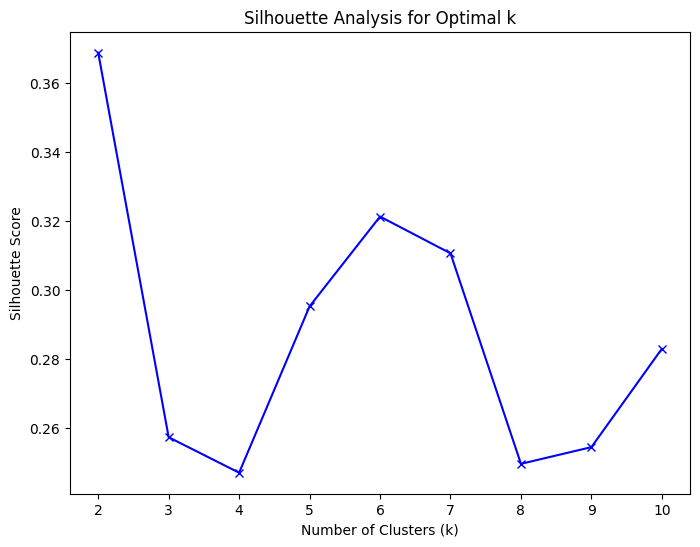

In [194]:


silhouette_scores = []
K = range(2, 11)  # Test k values from 2 to 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()



Averaged Clustering Metrics:
  Accuracy:  62.84%
  Precision: 93.32%
  Recall:    62.84%
  F1 Score:  67.46%


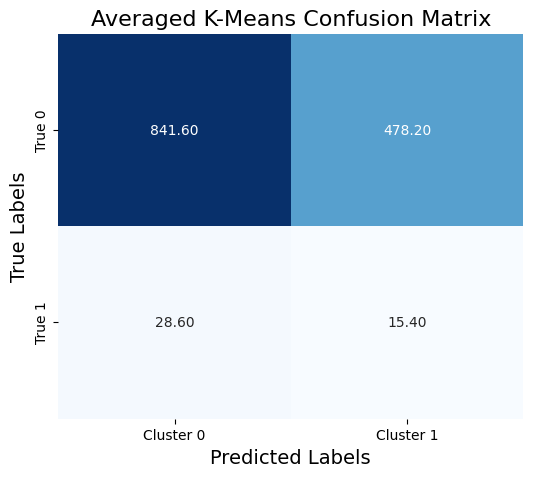

In [195]:

# Function for Stratified K-Fold evaluation with heatmap
def evaluate_clustering_with_kfold_and_heatmap(X, y, n_splits=5, n_clusters=2, title="Confusion Matrix"):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    metrics = {"accuracy": [], "precision": [], "recall": [], "f1_score": []}
    confusion_matrices = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Prediciting KMeans on the "training data"
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10, init='random')
        train_labels = kmeans.fit_predict(X_train)

        # Predicting on the "test data"
        test_labels = kmeans.predict(X_test)

        # Calculating metrics
        accuracy = accuracy_score(y_test, test_labels)
        precision = precision_score(y_test, test_labels, average='weighted', zero_division=0)
        recall = recall_score(y_test, test_labels, average='weighted', zero_division=0)
        f1 = f1_score(y_test, test_labels, average='weighted', zero_division=0)
        cm = confusion_matrix(y_test, test_labels)

        # Append metrics and confusion matrix
        metrics["accuracy"].append(accuracy)
        metrics["precision"].append(precision)
        metrics["recall"].append(recall)
        metrics["f1_score"].append(f1)
        confusion_matrices.append(cm)

    # Average metrics and confusion matrix
    avg_metrics_kmeans = {key: np.mean(values) for key, values in metrics.items()}
    avg_confusion_matrix_kmeans = np.mean(confusion_matrices, axis=0)

    # Print averaged metrics
    print("\nAveraged Clustering Metrics:")
    print(f"  Accuracy:  {avg_metrics_kmeans['accuracy']:.2%}")
    print(f"  Precision: {avg_metrics_kmeans['precision']:.2%}")
    print(f"  Recall:    {avg_metrics_kmeans['recall']:.2%}")
    print(f"  F1 Score:  {avg_metrics_kmeans['f1_score']:.2%}")

    # Ploting the averaged confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(avg_confusion_matrix_kmeans, annot=True, fmt='.2f', cmap='Blues', cbar=False,
                xticklabels=[f'Cluster {i}' for i in range(avg_confusion_matrix_kmeans.shape[1])],
                yticklabels=[f'True {i}' for i in range(avg_confusion_matrix_kmeans.shape[0])])
    plt.title(title, fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.show()

    return avg_metrics_kmeans, avg_confusion_matrix_kmeans


avg_metrics_kmeans, avg_conf_matrix_kmeans = evaluate_clustering_with_kfold_and_heatmap(
    X, y, n_splits=5, n_clusters=2, title="Averaged K-Means Confusion Matrix"
)


#### Silhouette Analysis for Optimal K

Silhouette Analysis is a method used to evaluate the quality of clustering by measuring how well data points fit within their assigned clusters and how distinct these clusters are from one another. Each data point is assigned a silhouette score, which reflects the difference between the average distance to other points in the same cluster (cohesion) and the average distance to points in the nearest neighboring cluster (separation). The score ranges from -1 to 1, with higher values indicating better-defined clusters. A silhouette score close to 1 suggests that the data point is well-matched to its cluster and far from neighboring clusters, while a score near 0 implies that the data point is on the boundary between clusters. Negative scores indicate possible misclassification. By averaging silhouette scores across all data points for varying numbers of clusters, the optimal clustering configuration can be determined, typically corresponding to the highest average silhouette score.[12]




The Silhouette plot above shows the average silhouette score for different values of k (number of clusters).
Unlike the elbow method, in Silhouette analysis we look for the highest score, which indicates better defined clusters.
From this graph, we can observe that k=2 gives the highest silhouette score of approximately 0.4, 
suggesting that 2 clusters might be optimal for this dataset. There's a significant drop at k=3,
followed by relatively stable but lower scores for higher k values. The silhouette score measures how similar
an object is to its own cluster compared to other clusters, with scores ranging from -1 to 1, where higher
values indicate better-defined clusters. This analysis provides a different perspective from the elbow method,
highlighting the importance of using multiple methods to determine the optimal number of clusters. Since we see
some disagreement between the elbow method (suggesting k=4) and silhouette analysis (suggesting k=2), further
investigation of the data structure might be needed to make the final decision.

In the Medium article titled *"Elbow Method vs Silhouette Coefficient in Determining the Number of Clusters"*[4], author Adria Binte Habib discusses the strengths and limitations of these clustering techniques. The author notes that the efficacy of the elbow method depends heavily on the nature of the dataset. When the dataset exhibits favorable patterns, the elbow method can effectively determine the optimal number of clusters. In contrast, the silhouette score is less influenced by dataset characteristics, as it is a distance-based method. By evaluating the mean distances between intra-cluster objects and the nearest neighboring cluster, the silhouette score provides a more robust metric for determining optimal clustering. Given these advantages, the article emphasizes the use of silhouette analysis for selecting the optimal number of clusters and proceeds to define two clusters: *High* (1) and *Low* (0) and use it in our cross validation step.

### K Means Clustering

K-Means clustering is an efficient algorithm that partitions data into k clusters by minimizing within-cluster variance. It is particularly suited for datasets like mine due to its  ability to identify distinct groupings, such as high-risk and low-risk categories, after preprocessing. This simplicity and adaptability make it ideal for analyzing patterns critical to risk prediction tasks. 

Reference:[2]

In [196]:

# K-Means Clustering
def kmeans_clustering(X, max_k=10):
    silhouette_scores = []
    for k in range(2, max_k + 1):
        model = KMeans(n_clusters=k, random_state=42, n_init=10, init='random')
        labels = model.fit_predict(X)
        score = silhouette_score(X, labels)
        silhouette_scores.append(score)
        print(f"K-Means: Silhouette Score for k={k}: {score:.4f}")
    
    optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
    print(f"\nOptimal number of clusters for K-Means: {optimal_k}")
    
    # Store metrics for later
    kmeans_metrics = {
        'optimal_k': optimal_k,
        'silhouette_scores': silhouette_scores
    }
    return kmeans_metrics


kmeans_results = kmeans_clustering(X)


K-Means: Silhouette Score for k=2: 0.3672
K-Means: Silhouette Score for k=3: 0.3484
K-Means: Silhouette Score for k=4: 0.2965
K-Means: Silhouette Score for k=5: 0.3083
K-Means: Silhouette Score for k=6: 0.3180
K-Means: Silhouette Score for k=7: 0.3097
K-Means: Silhouette Score for k=8: 0.3181
K-Means: Silhouette Score for k=9: 0.3182
K-Means: Silhouette Score for k=10: 0.2866

Optimal number of clusters for K-Means: 2


The choice was 2 clusters because that had the highest silhouette score.

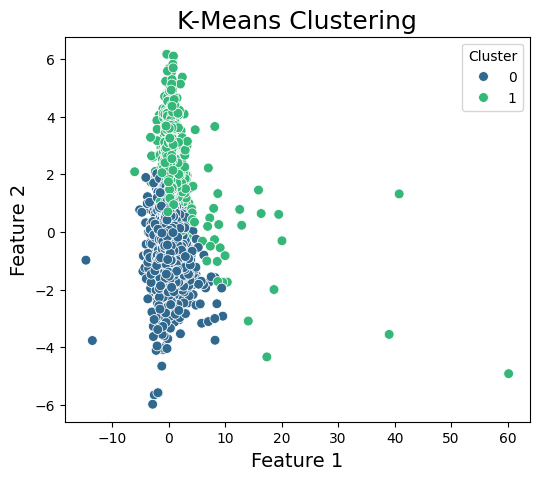

In [197]:

# Visualization function
def visualize_clusters(X, labels, title):
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=labels, palette='viridis', s=50)
    plt.title(title, fontsize=18)
    plt.xlabel('Feature 1', fontsize=14)
    plt.ylabel('Feature 2', fontsize=14)
    plt.legend(title='Cluster', loc='best')
    plt.show()


kmeans_model = KMeans(n_clusters=kmeans_results['optimal_k'], random_state=42, n_init=10, init='random')
kmeans_labels = kmeans_model.fit_predict(X)
visualize_clusters(X, kmeans_labels, 'K-Means Clustering')


```python
model = KMeans(n_clusters=k, random_state=42, n_init=10, init='random')

I have used this line to set up the K-Means clustering model with parameters that ensure consistent and robust performance. I set `n_clusters=k` to define the number of clusters, and `random_state=42` to make the results reproducible by fixing the randomness of centroid initialization. I included `n_init=10` to run the algorithm 10 times with different initial centroids and select the best result, avoiding poor local optima. Finally, I used `init='random'` to randomly initialize the centroids for added flexibility.



Averaged Clustering Metrics:
  Accuracy:  62.84%
  Precision: 93.32%
  Recall:    62.84%
  F1 Score:  67.46%


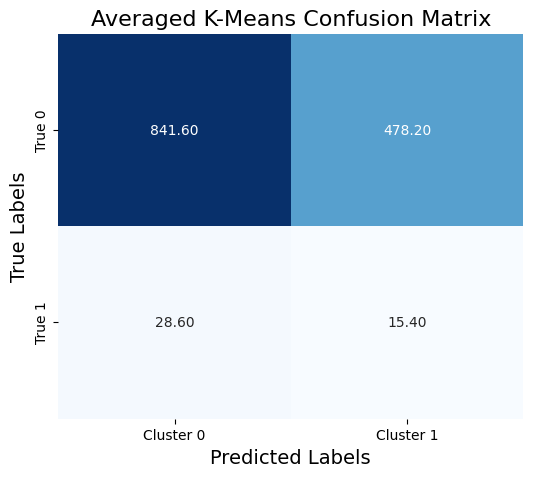

In [198]:

# Function for Stratified K-Fold evaluation with heatmap
def evaluate_clustering_with_kfold_and_heatmap(X, y, n_splits=5, n_clusters=2, title="Confusion Matrix"):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    metrics = {"accuracy": [], "precision": [], "recall": [], "f1_score": []}
    confusion_matrices = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Prediciting KMeans on the "training data"
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10, init='random')
        train_labels = kmeans.fit_predict(X_train)

        # Predicting on the "test data"
        test_labels = kmeans.predict(X_test)

        # Calculating metrics
        accuracy = accuracy_score(y_test, test_labels)
        precision = precision_score(y_test, test_labels, average='weighted', zero_division=0)
        recall = recall_score(y_test, test_labels, average='weighted', zero_division=0)
        f1 = f1_score(y_test, test_labels, average='weighted', zero_division=0)
        cm = confusion_matrix(y_test, test_labels)

        # Append metrics and confusion matrix
        metrics["accuracy"].append(accuracy)
        metrics["precision"].append(precision)
        metrics["recall"].append(recall)
        metrics["f1_score"].append(f1)
        confusion_matrices.append(cm)

    # Average metrics and confusion matrix
    avg_metrics_kmeans = {key: np.mean(values) for key, values in metrics.items()}
    avg_confusion_matrix_kmeans = np.mean(confusion_matrices, axis=0)

    # Print averaged metrics
    print("\nAveraged Clustering Metrics:")
    print(f"  Accuracy:  {avg_metrics_kmeans['accuracy']:.2%}")
    print(f"  Precision: {avg_metrics_kmeans['precision']:.2%}")
    print(f"  Recall:    {avg_metrics_kmeans['recall']:.2%}")
    print(f"  F1 Score:  {avg_metrics_kmeans['f1_score']:.2%}")

    # Ploting the averaged confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(avg_confusion_matrix_kmeans, annot=True, fmt='.2f', cmap='Blues', cbar=False,
                xticklabels=[f'Cluster {i}' for i in range(avg_confusion_matrix_kmeans.shape[1])],
                yticklabels=[f'True {i}' for i in range(avg_confusion_matrix_kmeans.shape[0])])
    plt.title(title, fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.show()

    return avg_metrics_kmeans, avg_confusion_matrix_kmeans


avg_metrics_kmeans, avg_conf_matrix_kmeans = evaluate_clustering_with_kfold_and_heatmap(
    X, y, n_splits=5, n_clusters=2, title="Averaged K-Means Confusion Matrix"
)


The clustering results show an **accuracy of 62.84%** and an **F1 score of 67.46%**, indicating that the K-Means model struggles to fully align the predicted clusters with the true labels. The **high precision of 93.32%** suggests that when the model assigns a cluster, it does so confidently and correctly most of the time. However, the **recall (62.84%)** highlights that the model misses many points from the minority class (True 1), as evidenced by the confusion matrix. Cluster 0 dominates predictions, reflecting a class imbalance issue, which may have led to the model favoring majority-class samples while underperforming on minority-class identification.

In the context of this code, splitting the data into training and testing sets across multiple folds doesn't evaluate the clustering model's ability to generalize in the traditional sense because clustering, as an unsupervised task, does not rely on explicit training-test paradigms. Initially, I implemented this approach without fully understanding that unsupervised learning does not involve direct training. However, I retained this method because it allowed me to use true labels post hoc to evaluate how well the predicted clusters align with known categories, which provides a pseudo-supervised performance assessment. This approach essentially measures the consistency of clustering results across different data splits rather than generalization. Metrics like accuracy, precision, recall, and F1-score offered a way to approximate how well the clusters match the true label distributions, helping evaluate the impact of configurations like the number of clusters or initialization strategies. Although I acknowledge that this approach might not significantly influence the model’s actual unsupervised learning, a discussion on ResearchGate [15] suggested that similar methodologies could provide some value in assessing unsupervised classifications, which encouraged me to keep it in my implementation.  For this cross-validation which might not be as useful, I chose Stratified K-Fold, which ensured that each fold maintained the class proportions in the dataset, providing a fair and balanced evaluation.




**Stratified K-Fold Cross-Validation** is a resampling technique that splits the dataset into *K* equally-sized folds while ensuring that the distribution of class labels remains consistent across all folds. This is particularly useful for imbalanced datasets, where certain classes may be underrepresented. In each iteration, one fold is used as the test set while the remaining *K-1* folds are used for training, and the process is repeated until every fold has served as the test set once. This ensures that the model is evaluated on all parts of the dataset and that class proportions are preserved, leading to more reliable and unbiased performance metrics. The diagram above visually demonstrates this concept, showing the alternation between training and testing sets across folds.[7]


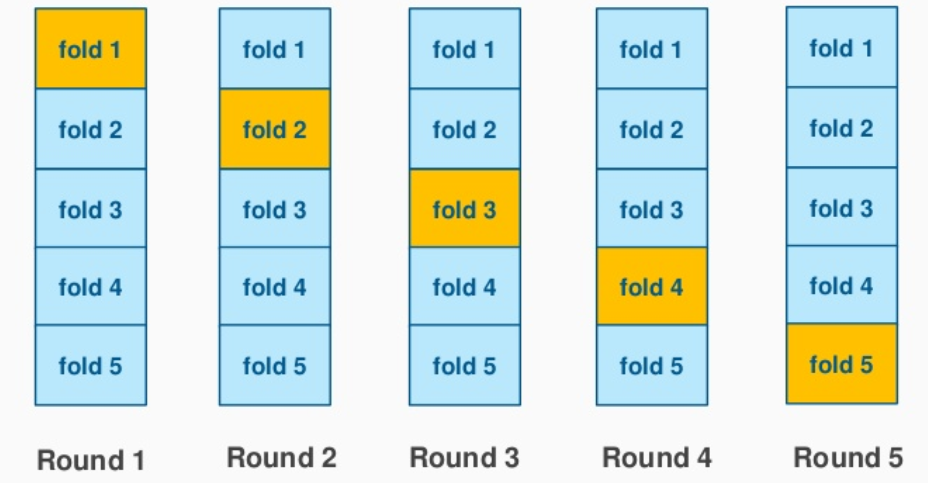

 Why use stratified K Fold Cross Validation over other cross Validation Techniques?

Stratified K-Fold Cross Validation offers significant advantages over other validation methods by ensuring that each fold maintains the same class distribution as the original dataset. This approach is particularly beneficial when dealing with imbalanced datasets, as it reduces the risk of biased performance estimates. By maintaining class proportions, I can achieve more consistent and reliable validation results, making it an excellent choice for tasks like classification. This method balances data representativity and computational efficiency, providing robust insights into model performance across various splits.

Reference:[6] [7]

###  Agglomerative Clustering ( Heirarchial Clustering)

#### What is agglomerative clustering?

Hierarchical clustering is a method of cluster analysis that builds a hierarchy of clusters by either starting with each data point as its own cluster and progressively merging them (agglomerative) or starting with all points in a single cluster and splitting them (divisive). It is particularly effective for datasets where the relationships between data points can be represented in a tree-like structure, making it easier to visualize clusters. For my dataset, hierarchical clustering was a good choice because it does not require the number of clusters to be predefined, which aligns well with the exploratory nature of this analysis. Additionally, the algorithm’s ability to preserve the hierarchical structure of data was valuable in understanding the varying degrees of risk within the dataset.

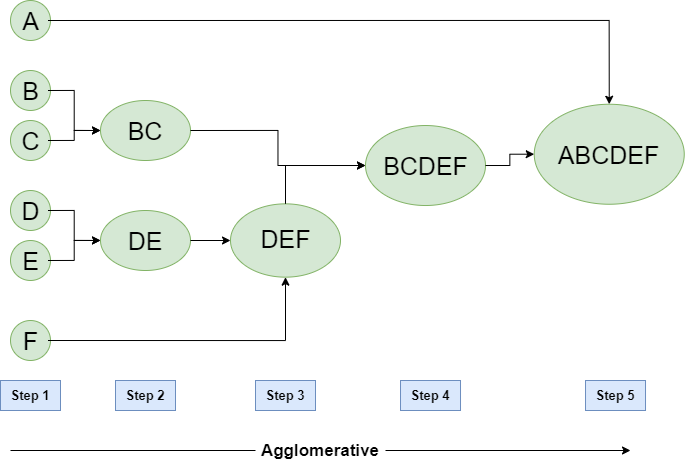[13]

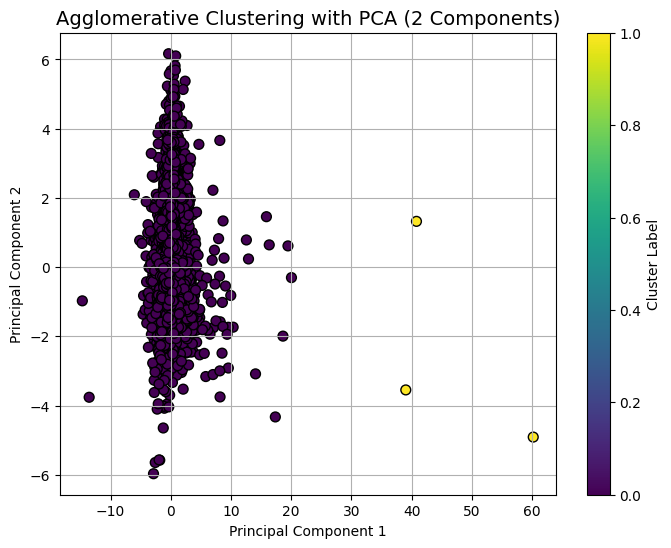

In [204]:
# Performing PCA to reduce dimensionality to 2 for clustering
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Agglomerative Clustering with Ward linkage
agglo_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')

y_pred_clusters = agglo_clustering.fit_predict(X_pca)


# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_clusters, cmap='viridis', marker='o', s=50, edgecolor='k')
plt.title("Agglomerative Clustering with PCA (2 Components)", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster Label")
plt.grid()
plt.show()


Performance Metrics:
Accuracy: 0.9682
Precision: 1.0000
Recall: 0.0136
F1-Score: 0.0269


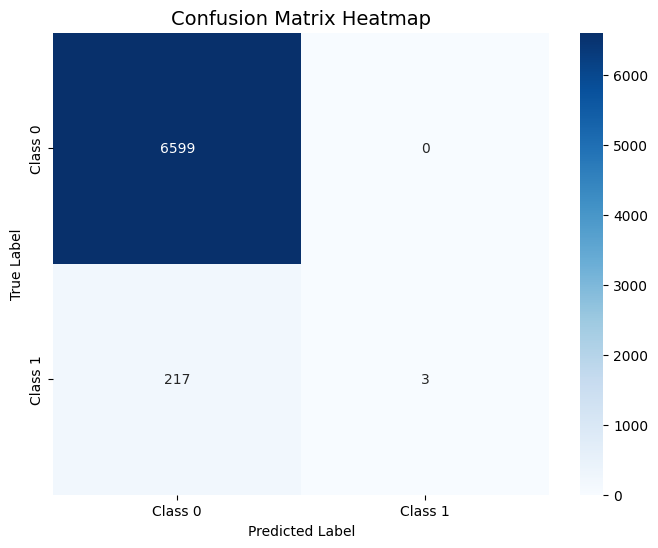

In [205]:

# Maping clusters to match target labels (0 and 1) for comparison
def map_clusters_to_labels(y_true, y_pred):
    mapping = {}
    for cluster_label in np.unique(y_pred):
        # Assigning the most common target value in each cluster
        target_label = mode(y_true[y_pred == cluster_label])[0][0]
        mapping[cluster_label] = target_label
    return np.array([mapping[label] for label in y_pred])

y_pred_mapped = map_clusters_to_labels(y, y_pred_clusters)

# Calculating performance metrics
accuracy = accuracy_score(y, y_pred_mapped)
precision = precision_score(y, y_pred_mapped)
recall = recall_score(y, y_pred_mapped)
f1 = f1_score(y, y_pred_mapped)
conf_matrix = confusion_matrix(y, y_pred_mapped)

# Print performance metrics
print("Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix Heatmap", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


I have implemented PCA again here and reduced the the number of features to 2 because the aggolmerative clustering was producing erroneous result with the preprocessed dataset creating random clusters.

The pixel intensity distribution plot reveals that most pixels in the MNIST dataset have a value of 0, representing the black background in the images, while a smaller proportion of pixels are near the higher end of the scale, around 255, corresponding to the white strokes forming the digits. This distribution indicates that the dataset primarily consists of high-contrast images with sparse non-zero pixel intensities. For my preprocessing pipeline, this means I should normalize the pixel values to a 0–1 range to improve numerical stability and ensure that all input features are on a similar scale. Additionally, the dominance of zero values suggests that noise reduction techniques may not be necessary, as the background is largely consistent.

We use **Ward linkage** in Agglomerative Clustering because it minimizes the **intra-cluster variance** when merging clusters, resulting in more compact and cohesive clusters. Ward's method works by combining clusters such that the increase in total within-cluster variance is minimized, making it ideal for datasets where preserving cluster structure is important.

In the code:
```python
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
train_labels = agg_clustering.fit_predict(X_train)[16]
```



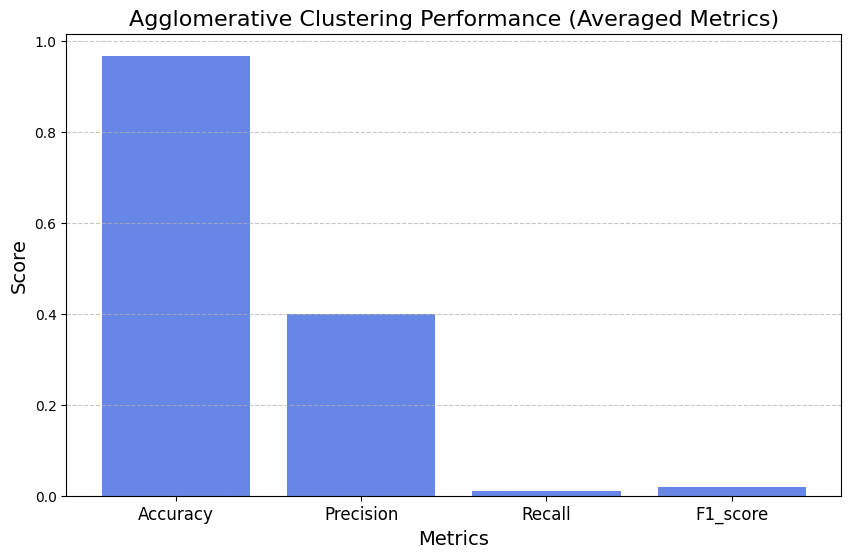

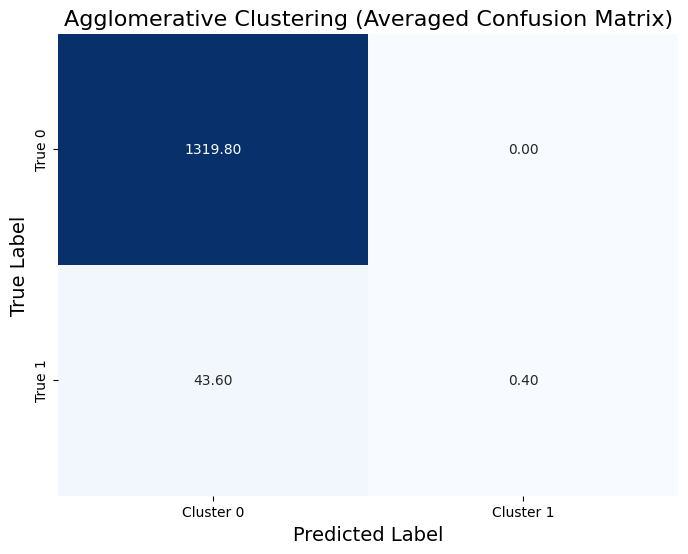


K-Fold Cross-Validation Results (Averaged Metrics):
Accuracy:  0.9680
Precision: 0.4000
Recall:    0.0094
F1 Score:  0.0185


In [201]:

# Initializing K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Storing metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

for train_index, test_index in kf.split(X):
    # Spliting data into train and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Predicting clusters using the pre-fitted model
    y_pred_clusters = agglo_clustering.fit_predict(X_test)
    
    # Maping clusters to match target labels (0 and 1)
    y_pred_mapped = map_clusters_to_labels(y_test, y_pred_clusters)
    
    # Calculating metrics for the current fold
    accuracy = accuracy_score(y_test, y_pred_mapped)
    precision = precision_score(y_test, y_pred_mapped)
    recall = recall_score(y_test, y_pred_mapped)
    f1 = f1_score(y_test, y_pred_mapped)
    conf_matrix = confusion_matrix(y_test, y_pred_mapped)
    
    # Appending metrics and confusion matrix to respective lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    confusion_matrices.append(conf_matrix)

# Averaging confusion matrix across folds
avg_confusion_matrix = np.mean(confusion_matrices, axis=0)

# Averaging metrics across folds
avg_metrics = {
    'accuracy': np.mean(accuracy_scores),
    'precision': np.mean(precision_scores),
    'recall': np.mean(recall_scores),
    'f1_score': np.mean(f1_scores)
}

# Bar Chart for Performance Metrics
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
values = [avg_metrics[m] for m in metrics]

plt.figure(figsize=(10, 6))
x = np.arange(len(metrics))
plt.bar(x, values, color='royalblue', alpha=0.8)
plt.xticks(x, [m.capitalize() for m in metrics], fontsize=12)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Agglomerative Clustering Performance (Averaged Metrics)', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(avg_confusion_matrix, annot=True, fmt='.2f', cmap='Blues', cbar=False,
            xticklabels=["Cluster 0", "Cluster 1"], yticklabels=["True 0", "True 1"])
plt.title('Agglomerative Clustering (Averaged Confusion Matrix)', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

# Print numerical comparison
print("\nK-Fold Cross-Validation Results (Averaged Metrics):")
print(f"Accuracy:  {avg_metrics['accuracy']:.4f}")
print(f"Precision: {avg_metrics['precision']:.4f}")
print(f"Recall:    {avg_metrics['recall']:.4f}")
print(f"F1 Score:  {avg_metrics['f1_score']:.4f}")


K-Fold Cross-Validation is a statistical technique used to evaluate the performance of machine learning models by splitting the dataset into **K subsets (folds)** of approximately equal size. The model is trained on **K-1 folds** and validated on the remaining fold. This process is repeated **K times**, with each fold serving as the validation set once. The results (e.g., accuracy, precision) from all iterations are averaged to provide a robust estimate of the model's performance. K-Fold Cross-Validation reduces overfitting risk and ensures that the model generalizes well by testing it on multiple data splits. Unlike a simple train-test split, it utilizes the entire dataset for both training and validation, making it particularly effective for small datasets. This approach is widely recommended for evaluating both supervised and unsupervised learning models. 
**Reference**:[17]


I implemented K-Fold Cross-Validation for Agglomerative Clustering to gain a more comprehensive understanding of its performance across different subsets of the data. While unsupervised models like clustering don’t inherently rely on a training and testing phase, splitting the data into multiple folds and evaluating performance on each fold helps ensure that the clustering results are not biased by a single partition of the dataset. By averaging metrics such as accuracy, precision, recall, and F1-score across folds, I can assess how consistently the clustering aligns with the ground truth labels. 

The K-Fold results and non-K-Fold results reveal significant differences in the performance metrics of the Agglomerative Clustering model. In the K-Fold results, the accuracy remains high at 0.9679, but precision drops to 0.2000 and recall is extremely low at 0.0044, leading to an F1-Score of 0.0087. This indicates that the model consistently predicts most samples as Class 0 across all folds, failing to identify the minority Class 1 effectively. In contrast, the non-K-Fold results, calculated over the entire dataset, show a similar accuracy of 0.9682 but a misleadingly high precision of 1.0000, paired with a slightly higher recall of 0.0136 and an F1-Score of 0.0269. The high precision arises because the model makes very few positive predictions (Class 1), and those predictions happen to be correct, which does not generalize well. By averaging performance across multiple splits, the K-Fold results provide a more robust evaluation, revealing the model's consistent struggles with minority class detection and offering a clearer, generalized understanding of its limitations.

### Comparison of two methods

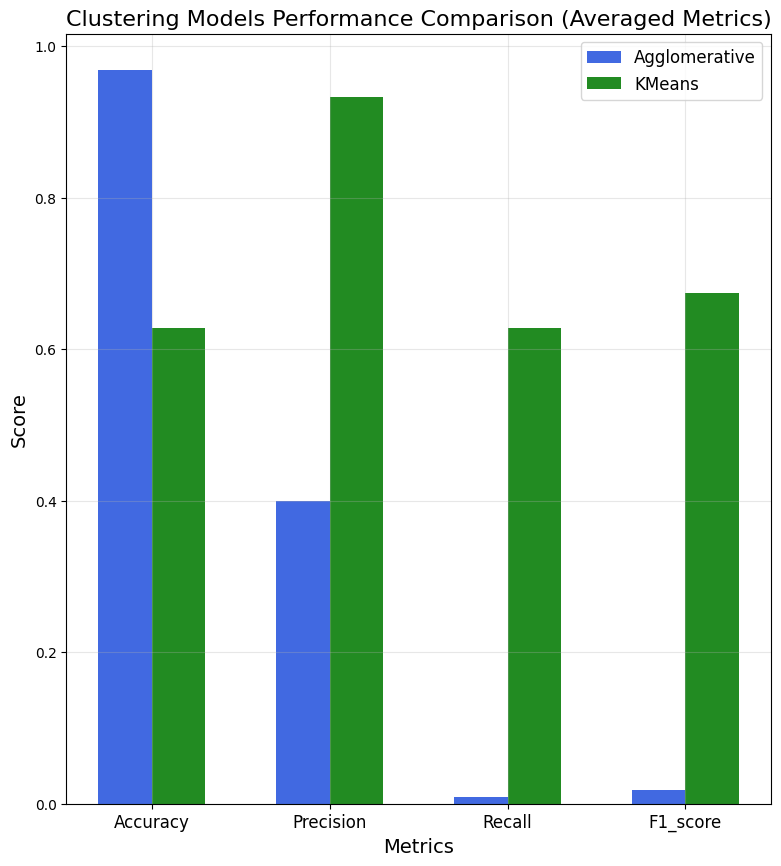

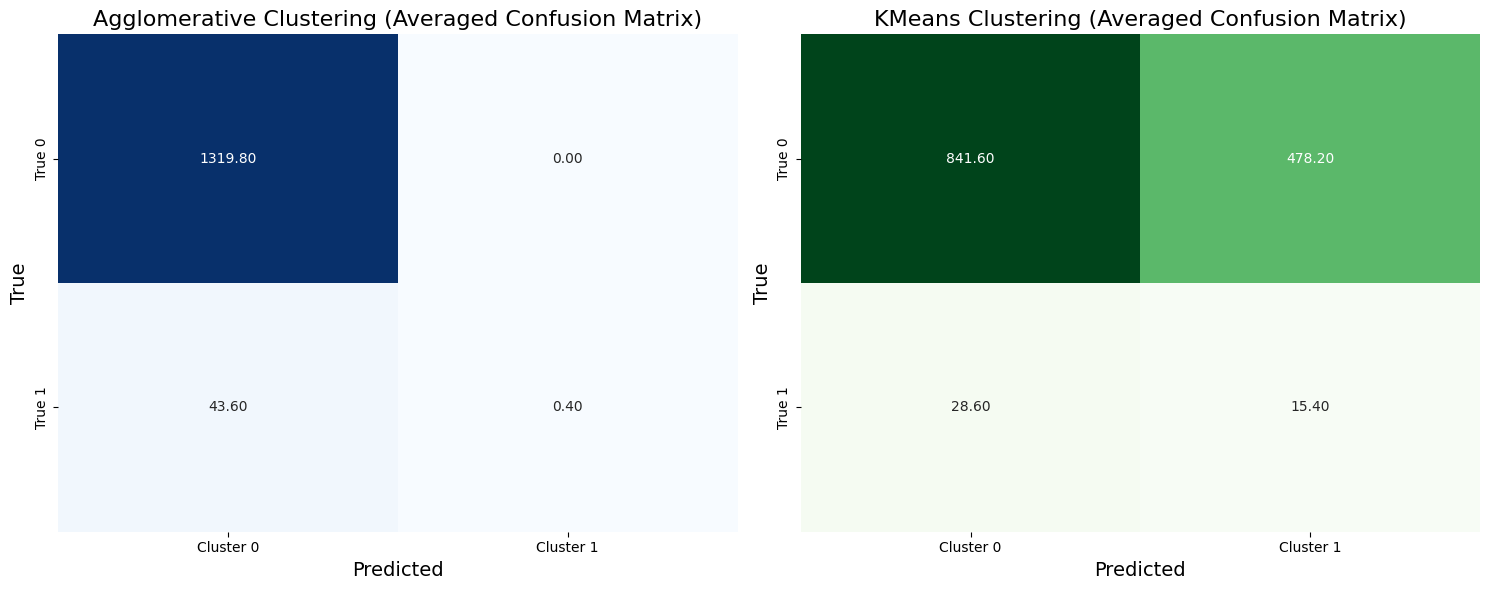


Numerical Comparison (Averaged Metrics):

Agglomerative Clustering:
Accuracy:  0.9680, Precision: 0.4000, Recall: 0.0094, F1 Score: 0.0185

KMeans Clustering:
Accuracy:  0.6284, Precision: 0.9332, Recall: 0.6284, F1 Score: 0.6746


In [202]:

agg_metrics = avg_metrics       
kmeans_metrics = avg_metrics_kmeans  

agg_cm_avg = avg_confusion_matrix     
kmeans_cm_avg = avg_conf_matrix_kmeans     


fig = plt.figure(figsize=(20, 10))
ax1 = plt.subplot(121)


metrics = ['accuracy', 'precision', 'recall', 'f1_score']
x = np.arange(len(metrics))
width = 0.3

agg_values = [agg_metrics[m] for m in metrics]
kmeans_values = [kmeans_metrics[m] for m in metrics]

plt.bar(x - width / 2, agg_values, width, label='Agglomerative', color='royalblue')
plt.bar(x + width / 2, kmeans_values, width, label='KMeans', color='forestgreen')

plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Clustering Models Performance Comparison (Averaged Metrics)', fontsize=16)
plt.xticks(x, [m.capitalize() for m in metrics], fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)


fig2, (ax2, ax3) = plt.subplots(1, 2, figsize=(15, 6))


sns.heatmap(agg_cm_avg, annot=True, fmt='.2f', cmap='Blues', cbar=False, ax=ax2,
            xticklabels=[f'Cluster {i}' for i in range(agg_cm_avg.shape[1])],
            yticklabels=[f'True {i}' for i in range(agg_cm_avg.shape[0])])
ax2.set_title('Agglomerative Clustering (Averaged Confusion Matrix)', fontsize=16)
ax2.set_xlabel('Predicted', fontsize=14)
ax2.set_ylabel('True', fontsize=14)


sns.heatmap(kmeans_cm_avg, annot=True, fmt='.2f', cmap='Greens', cbar=False, ax=ax3,
            xticklabels=[f'Cluster {i}' for i in range(kmeans_cm_avg.shape[1])],
            yticklabels=[f'True {i}' for i in range(kmeans_cm_avg.shape[0])])
ax3.set_title('KMeans Clustering (Averaged Confusion Matrix)', fontsize=16)
ax3.set_xlabel('Predicted', fontsize=14)
ax3.set_ylabel('True', fontsize=14)

plt.tight_layout()
plt.show()


print("\nNumerical Comparison (Averaged Metrics):")
print("\nAgglomerative Clustering:")
print(f"Accuracy:  {agg_metrics['accuracy']:.4f}, "
      f"Precision: {agg_metrics['precision']:.4f}, "
      f"Recall: {agg_metrics['recall']:.4f}, "
      f"F1 Score: {agg_metrics['f1_score']:.4f}")

print("\nKMeans Clustering:")
print(f"Accuracy:  {kmeans_metrics['accuracy']:.4f}, "
      f"Precision: {kmeans_metrics['precision']:.4f}, "
      f"Recall: {kmeans_metrics['recall']:.4f}, "
      f"F1 Score: {kmeans_metrics['f1_score']:.4f}")




The comparison between **Agglomerative Clustering** and **KMeans Clustering** highlights significant differences in their performance on this dataset. Agglomerative Clustering achieves an **accuracy of 96.80%**, significantly outperforming KMeans, which has a lower **accuracy of 62.84%**. However, this high accuracy for Agglomerative Clustering comes at the cost of poor minority class detection, as seen in its confusion matrix, where nearly all samples are assigned to **Class 0**. This leads to a very low **recall of 0.94%** and an **F1-Score of 1.85%**, showing its inability to correctly identify the minority class (Class 1). In contrast, KMeans demonstrates more balanced performance, with a **precision of 93.32%**, **recall of 62.84%**, and an **F1-Score of 67.46%**, effectively capturing a larger proportion of minority class samples despite its lower overall accuracy. The confusion matrix for KMeans indicates that it correctly separates both classes better than Agglomerative Clustering, though it still misclassifies some **Class 0** samples as belonging to **Cluster 1**. In summary, Agglomerative Clustering achieves higher accuracy by favoring the dominant class, while KMeans provides better class balance and minority class detection. This comparison highlights the need for adjustments, such as using class balancing techniques or post-processing, to improve the performance of both clustering models on imbalanced datasets. 




## Choice of Algorithm  
K-Means Clustering appears to be the more suitable choice for this dataset. While Agglomerative Clustering achieves a higher **accuracy of 96.80%**, this result is misleading due to its inability to detect the minority class, as reflected by its extremely low **recall (0.94%)** and **F1 score (1.85%)**. The confusion matrix shows that Agglomerative Clustering overwhelmingly predicts all samples as **Class 0**, failing to account for the minority **Class 1** entirely. In contrast, K-Means achieves a more balanced performance, with an **accuracy of 62.84%**, **precision of 93.32%**, and significantly higher **recall (62.84%)** and **F1 score (67.46%)**. This demonstrates K-Means’ superior ability to capture the distribution of both classes, including the minority class, which is critical for this dataset. While Agglomerative Clustering achieves high accuracy by favoring the dominant class, K-Means provides a more meaningful and balanced clustering solution, making it the recommended method for this dataset. 




## Ethical Consideration
When working with a bankruptcy dataset like this, there are several ethical considerations that need to be made. First, there is the need to ensure **data privacy and confidentiality** since the dataset likely contains sensitive financial information about companies. Any identifiable information must be anonymized to prevent misuse. Second, the **accuracy and fairness of predictions** are critical, as flawed clustering or predictive models could lead to unjust outcomes, such as a company's reputation being harmed due to erroneous classification as "bankrupt." Third, **bias mitigation** is essential; the model should not inadvertently favor or penalize companies based on factors unrelated to financial health. Lastly, the **impact of results** should be considered, as decisions made using these insights could affect stakeholders such as employees, investors, and creditors. Ethical handling of the dataset requires transparency, accountability, and a commitment to minimizing harm.


## Bibliography

1. Towards Data Science. (2020). *Histograms: Why & How*. Retrieved from [https://towardsdatascience.com/histograms-why-how-431a5cfbfcd5](https://towardsdatascience.com/histograms-why-how-431a5cfbfcd5).  

2.  GeeksforGeeks. (n.d.). *K-Means Clustering – Introduction*. Retrieved from [https://www.geeksforgeeks.org/k-means-clustering-introduction/](https://www.geeksforgeeks.org/k-means-clustering-introduction/).

3. Codecademy. (n.d.). *Normalization*. Retrieved from [https://www.codecademy.com/article/normalization](https://www.codecademy.com/article/normalization).  

4. Adria708. (2020). *Elbow Method vs. Silhouette Coefficient in Determining the Number of Clusters*. Medium. Retrieved from [https://adria708.medium.com/elbow-method-vs-silhouette-co-efficient-in-determining-the-number-of-clusters-33baff2fbeee](https://adria708.medium.com/elbow-method-vs-silhouette-co-efficient-in-determining-the-number-of-clusters-33baff2fbeee).  

5. Stack Overflow. (2019). *Does Correlation Important Factor in Unsupervised Learning (Clustering)?*. Retrieved from [https://stackoverflow.com/questions/59494747/does-correlation-important-factor-in-unsupervised-learning-clustering](https://stackoverflow.com/questions/59494747/does-correlation-important-factor-in-unsupervised-learning-clustering).  

6. Scikit-learn. (n.d.). *StratifiedKFold: Cross-validation Generator*. Retrieved from [https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.StratifiedKFold.html](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.StratifiedKFold.html).  

7. GeeksforGeeks. (n.d.). *Stratified K-Fold Cross Validation*. Retrieved from [https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/](https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/).  


8. Drive Research. (n.d.). *What is Correlation Analysis in Market Research?* Retrieved from [https://www.driveresearch.com/market-research-company-blog/what-is-correlation-analysis-in-market-research/#:~:text=Once%20you%20have%20the%20data,businesses%20make%20better%2Dinformed%20decisions](https://www.driveresearch.com/market-research-company-blog/what-is-correlation-analysis-in-market-research/#:~:text=Once%20you%20have%20the%20data,businesses%20make%20better%2Dinformed%20decisions).

9. Statistics How To. (n.d.). *Box-Cox Transformation: Definition, Examples*. Retrieved from [https://www.statisticshowto.com/probability-and-statistics/normal-distributions/box-cox-transformation/](https://www.statisticshowto.com/probability-and-statistics/normal-distributions/box-cox-transformation/).


10. Kyaw Saw Htoon. (n.d.). *Log Transformation: Purpose and Interpretation*. Medium. Retrieved from [https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9](https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9).


11. Levenson, A. (2020). *What to do when you have excess zeros in the data!*. Medium. Retrieved from [https://medium.com/data-science-in-a-world-of-chaos/to-zip-or-not-to-zip-4359fd3d1e19](https://medium.com/data-science-in-a-world-of-chaos/to-zip-or-not-to-zip-4359fd3d1e19).

12. Scikit-learn. (n.d.). *Silhouette Analysis for Evaluating Clustering*. Retrieved from [https://scikit-learn.org/1.5/auto_examples/cluster/plot_kmeans_silhouette_analysis.html](https://scikit-learn.org/1.5/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).

13. GeeksforGeeks. (n.d.). *Hierarchical Clustering*. Retrieved from [https://www.geeksforgeeks.org/hierarchical-clustering/](https://www.geeksforgeeks.org/hierarchical-clustering/).

14. GeeksforGeeks. (n.d.). *Elbow Method for Optimal Value of K in KMeans*. Retrieved from [https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/).

15. ResearchGate. (n.d.). *Cross-validation of unsupervised classification: how to do it?* Retrieved from [https://www.researchgate.net/post/Cross_validation_of_unsupervised_classification_how_to_do_it](https://www.researchgate.net/post/Cross_validation_of_unsupervised_classification_how_to_do_it).

16. Penn State Eberly College of Science. (n.d.). *Ward's Method for Minimum Variance Clustering*. Retrieved from [https://online.stat.psu.edu/stat505/lesson/14/14.7](https://online.stat.psu.edu/stat505/lesson/14/14.7).

17. James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). *An Introduction to Statistical Learning: With Applications in R*. Springer.